# Phase-4-project
![Alt text](<timepic.png>)

## Moringa Phase 4 Project Submission

#### GROUP 4:

- Student name: Kenneth Karanja
- Student name: Pete Njagi
- Student name: James Koli
- Student name: Tom Mwabire
- Student name: Paul Mwangi
- Student name: Lee Ndung'u
- Student name: Edwin Mwenda

Scheduled project review date/time: April 12th 2024


# Forecasting Housing Market Trends for Real Estate Investment Strategy
![Alt text](<zillow.png>)

#### Important Project Files:

1. index.ipynb (Main Jupyter document)
2. Presentation.pdf (Presentation)
3. zillow_data.csv (Main Data)
4. Project Report Pdf

## 0. Business Use Case and Project Overview 


`Our client is a Kenyan real estate investment firm aiming` to provide Kenyans and the diaspora with accessible investment opportunities in the US housing market, with a particular emphasis on low-cost housing. This initiative seeks to leverage data-driven insights to identify and recommend regions in the USA where investment in affordable housing would be most beneficial, both for rental and purchase purposes, within a short to mid-term investment horizon.

For this project, our dataset originates from `Zillow`, renowned for its comprehensive coverage of the US real estate market. It includes median home prices across numerous metropolitan and non-metropolitan regions, reflecting a broad spectrum of the housing market. Specifically, the dataset encapsulates housing price data for thousands of regions across the US, tracking changes from `April 1996` through to the latest available data point in `April 2018`.

Given the unique focus of our Kenyan clients, our analysis will concentrate on identifying US regions that offer the most promising opportunities for investment in low-cost housing. This will include filtering the dataset to spotlight areas that align with the financial capabilities and investment goals of our clientele. Additionally, we will tailor our data processing and analysis to exclude periods of significant market instability, such as the 2008 housing market crash, to ensure our predictions remain relevant and accurate for the current investment climate.

Our goal is to empower our clients with the knowledge to make informed decisions, offering them a gateway to viable and lucrative investment opportunities in the US real estate market, specifically within the affordable housing segment. Through meticulous analysis and forecasting, we aim to highlight regions that not only promise good returns but also contribute to building a stable investment portfolio for Kenyans looking to invest abroad.

# Step 1: Loading the Data/Filtering for Chosen Zipcodes

### 1.1 Importing the Necessary Libraries and packages

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from matplotlib.pylab import rcParams

These are the Python libraries and packages imported for data manipulation, visualization, and time series analysis.

In [52]:
#Loading the data 
file_path = 'zillow_data.csv'
df = pd.read_csv(file_path)
dx = pd.read_csv('zillow_data.csv')
#Showing the first five rows 
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


 The dataset is loaded and basic exploratory data analysis (EDA) is performed to understand its structure and content.

In [53]:
#Showing the last first rows 
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [54]:
# Looking at the datatypes 
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [55]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


### Data Analysis Conclusion:

There are 272 columns and 14,723 entries in it. Here's a quick rundown of its composition and the kinds of data it contains:

{RegionID~, RegionName, City, State, Metro (metropolitan area), and CountyName are among the `Geographical Identifiers`.

`SizeRank`: A size-based ranking of regions, probably associated with the size of the market or the quantity of properties.

`Time Series Data`: Time-series data covering the period from April 1996 (1996-04) to April 2018 (2018-04) makes up the majority of the dataset. These columns appear to show the values or prices of housing in each region over time; considering the naming convention (2017-07 for July 2017), this is probably done on a monthly basis.

`Data Types`: The dataset comprises object types (for textual data like City and State), integers (for identifiers like RegionID and rankings like SizeRank), and floating point numbers (for the housing values).

The data's time series format implies that it may be utilised to examine long-term patterns as well as more precise monthly variations in housing prices.

Furthermore, regional analysis and comparisons between various locations, states, and metropolitan areas are made possible by the geographical identifiers.


# Step 2: Data Preprocessing

*   **Rows**: The dataset consists of 14,723 entries, each corresponding to a different region.
    
*   **Columns**: There are 272 columns in total. Here's a breakdown of some key columns:
    
    *   **RegionID**: A unique identifier for each region.
        
    *   **RegionName**: The ZIP code of the region.
        
    *   **City**: The city in which the region is located.
        
    *   **State**: The state in which the region is located.
        
    *   **Metro**: The metropolitan area the region belongs to.
        
    *   **CountyName**: The name of the county the region is in.
        
    *   **SizeRank**: A ranking of the region based on its size.
        
    *   Monthly columns from **1996-04** to **2018-04**: These columns represent the median home value for each region for every month starting from April 1996 to April 2018.

In [57]:
#Checking for null values
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['Metro', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12',
       ...
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06'],
      dtype='object', length=220)

In [58]:

print(f'The number of duplicates within the dataset is : {df.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [59]:
#Checking for missing values 
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [60]:
#Filling missing values 
df['Metro'].fillna('None', inplace=True)
df.isna().sum()

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\3299694513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Metro'].fillna('None', inplace=True)


RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

This section handles missing values, particularly in the 'Metro' column, which is filled with 'None', and other columns where missing values are filled with the mean of each respective column.

In [61]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06'],
      dtype='object', length=219)

In [62]:
for column in df.iloc[:,7:]:
    if df[column].isna().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

df.isna().sum()

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\3740265303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [63]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index([], dtype='object')

In [64]:
#calculating the ROI
df['ROI'] = ((df['2018-04'] - df['1996-04']) / df['1996-04']) * 100
dx["%ROI"] = ((df["2018-04"] / dx["2012-01"]) ** (1 / (2018-2012)) - 1) * 100
dx['ROI price'] = df["2018-04"] - df["2012-01"]-1
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,208.378217
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,36.529487
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,56.796578
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,162.397109
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,57.179819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,217700,218600,218500,218100,216400,213100,209800,209200,209300,121.247357
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,208400,212200,215200,214300,213100,213700,218300,222700,225800,143.581446
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,122800,124600,126700,128800,130600,131700,132500,133000,133400,133.625219
14721,93733,81225,Mount Crested Butte,CO,None,Gunnison,14722,191100.0,192400.0,193700.0,...,671200,682400,695600,695500,694700,706400,705300,681500,664400,247.671376


In [65]:
# Checking for missing values 
df.isna().sum()/len(df)*100

RegionID      0.0
RegionName    0.0
City          0.0
State         0.0
Metro         0.0
             ... 
2018-01       0.0
2018-02       0.0
2018-03       0.0
2018-04       0.0
ROI           0.0
Length: 273, dtype: float64

# Melting our specific data

In [66]:
#checking for null values
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index([], dtype='object')

In [67]:
# convert wide format to long format
data = pd.melt(dx, 
               id_vars=['RegionID','RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','%ROI','ROI price'], 
               var_name='Date')

# rename RegionID to zipcode
data = data.rename(columns={'RegionName': 'Zipcode','value':'Price'})

#convert zipcode to categorical datatype
data['Zipcode'] = data['Zipcode'].astype('str')

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m')

data.head()

,RegionID,Zipcode,SizeRank,City,State,Metro,CountyName,%ROI,ROI price,Date,Price
0,84654,60657,1,Chicago,IL,Chicago,Cook,5.730851,292899.0,1996-04-01,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,8.285652,122199.0,1996-04-01,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,4.828700,81299.0,1996-04-01,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,5.856559,378099.0,1996-04-01,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,1.305960,9099.0,1996-04-01,77300.0


Here, the data is transformed from wide format to long format using the melt() function, which is a common preprocessing step for time series analysis.

In [68]:
df['ROI'] = ((df['2018-04'] - df['1996-04']) / df['1996-04']) * 100
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,208.378217
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,36.529487
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,56.796578
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,162.397109
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,57.179819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,217700,218600,218500,218100,216400,213100,209800,209200,209300,121.247357
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,208400,212200,215200,214300,213100,213700,218300,222700,225800,143.581446
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,122800,124600,126700,128800,130600,131700,132500,133000,133400,133.625219
14721,93733,81225,Mount Crested Butte,CO,None,Gunnison,14722,191100.0,192400.0,193700.0,...,671200,682400,695600,695500,694700,706400,705300,681500,664400,247.671376


In [69]:
# Define the price categories based on quantiles
quantiles = df['2018-04'].quantile([0.25, 0.75])

# Categorize each property
df['PriceCategory'] = pd.cut(df['2018-04'],
                             bins=[df['2018-04'].min(), quantiles[0.25], quantiles[0.75], df['2018-04'].max()],
                             labels=['Low Price', 'Middle Price', 'High Price'],
                             include_lowest=True)

# To verify our categorization, let's display the count of properties in each category
price_category_counts = df['PriceCategory'].value_counts()

price_category_counts


PriceCategory
Middle Price    7359
Low Price       3684
High Price      3680
Name: count, dtype: int64

In [70]:
def filter_and_melt(data,cut_off):
    new_df = data.loc[data['ROI'] >= cut_off]
    melted_subset = pd.melt(new_df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'ROI', 'PriceCategory'], var_name='time')
    melted_subset['time'] = pd.to_datetime(melted_subset['time'], format='%Y-%m')
    melted_subset.groupby('time')
    melted_subset = melted_subset.loc[melted_subset['time'] > '2000-01'] 
    melted_subset = melted_subset.loc[melted_subset['value'] < 200000]
    
    return melted_subset

In [71]:
cut_off = 125
melted_subset = filter_and_melt(df,cut_off)

In [72]:
melted_subset.head(100)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,ROI,PriceCategory,time,value
275588,61807,10467,New York,NY,New York,Bronx,7,173.315893,High Price,2000-02-01,176400.0
275592,71831,32162,The Villages,FL,The Villages,Sumter,12,149.306931,Middle Price,2000-02-01,123800.0
275595,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,16,304.065574,High Price,2000-02-01,184300.0
275596,84646,60647,Chicago,IL,Chicago,Cook,17,283.211084,High Price,2000-02-01,169300.0
275597,74242,37211,Nashville,TN,Nashville,Davidson,18,169.867211,Middle Price,2000-02-01,115900.0
...,...,...,...,...,...,...,...,...,...,...,...
275753,79398,48823,East Lansing,MI,Lansing,Ingham,314,160.561497,Middle Price,2000-02-01,142600.0
275754,70496,29464,Mount Pleasant,SC,Charleston,Charleston,318,287.605203,High Price,2000-02-01,190300.0
275756,60594,7087,Union City,NJ,New York,Hudson,320,252.631579,High Price,2000-02-01,159500.0
275758,67598,23223,Richmond,VA,Richmond,Richmond City,324,152.310231,Middle Price,2000-02-01,73500.0


In [73]:
# filling missing values 
data['Metro'].fillna('Missing',inplace = True)
# Recheck for missing values in Metro column
data.isna().sum()/len(data)*100

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\3460545961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Metro'].fillna('Missing',inplace = True)


RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         0.000000
CountyName    0.000000
%ROI          1.521429
ROI price     0.000000
Date          0.000000
Price         4.021202
dtype: float64

# Step 3: EDA and Visualization

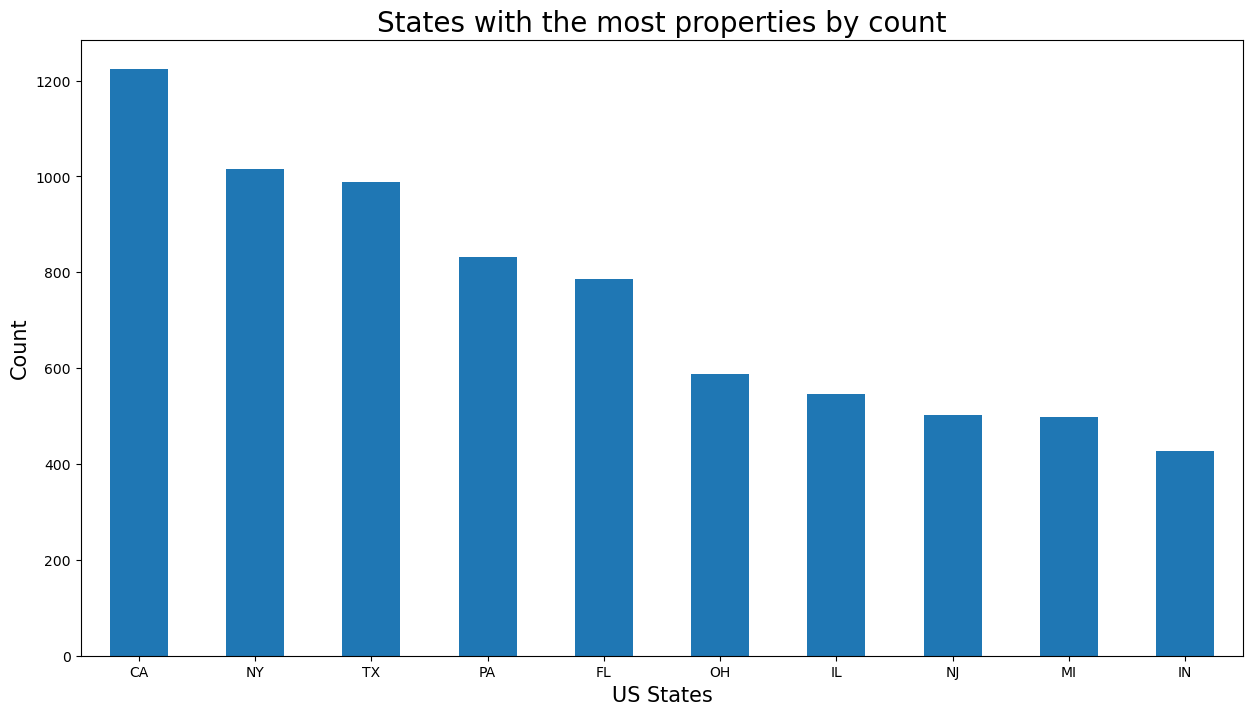

In [74]:
# plotting the most popular states in the dataset
plt.figure(figsize=(15,8))
df.State.value_counts()[:10].plot(kind="bar")
plt.xlabel("US States",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=0)
plt.title("States with the most properties by count",fontsize=20);

This visualizes the most popular states, counties, and cities based on the count of properties

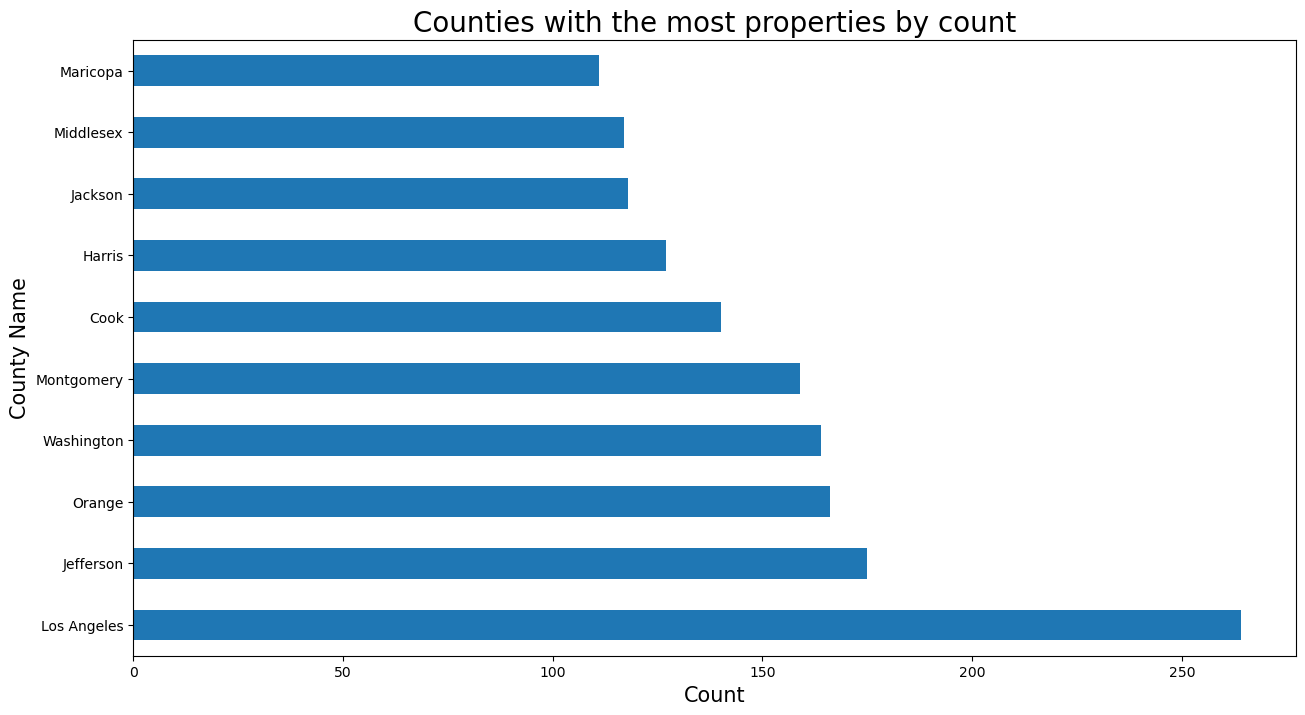

In [75]:
#Plotting the most popular counties in the dataset
plt.figure(figsize=(15,8))
df.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Counties with the most properties by count",fontsize=20);


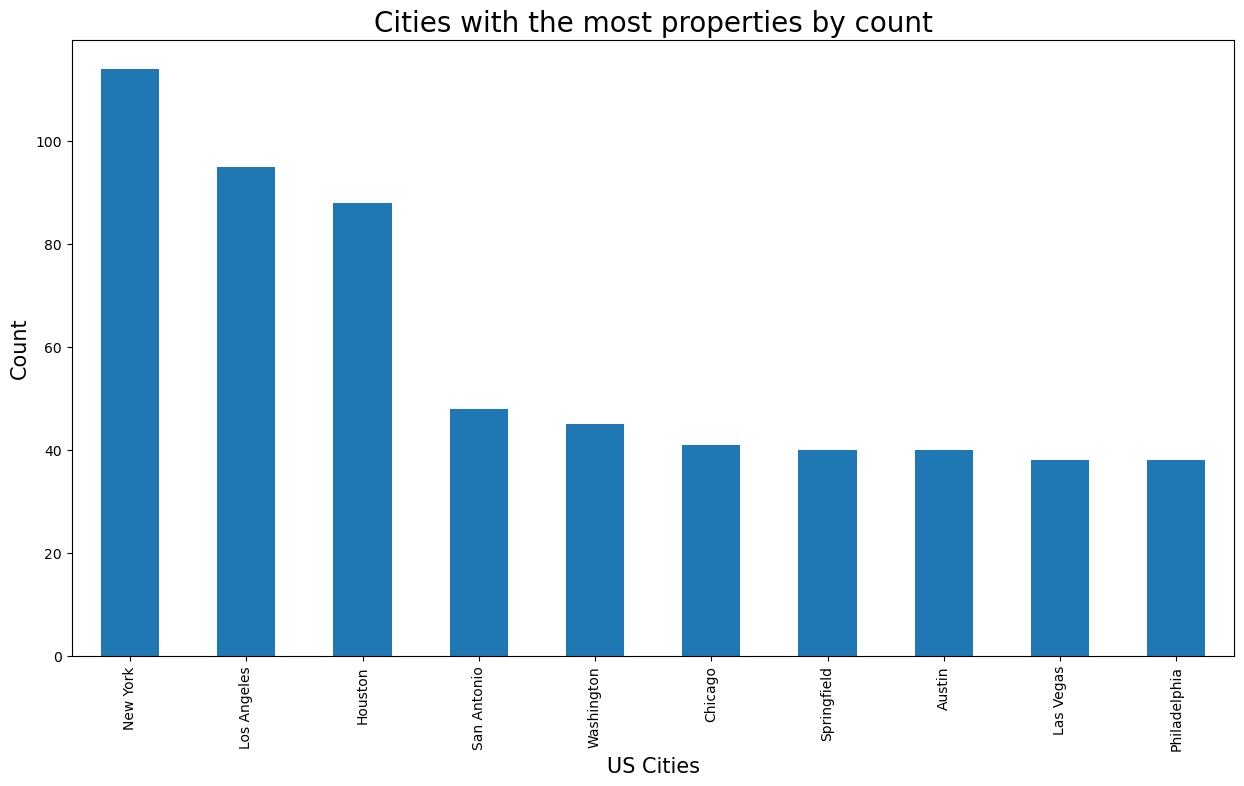

In [76]:
# plotting the most popular cities in the dataset
plt.figure(figsize=(15,8))
df.City.value_counts()[:10].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Cities with the most properties by count",fontsize=20);

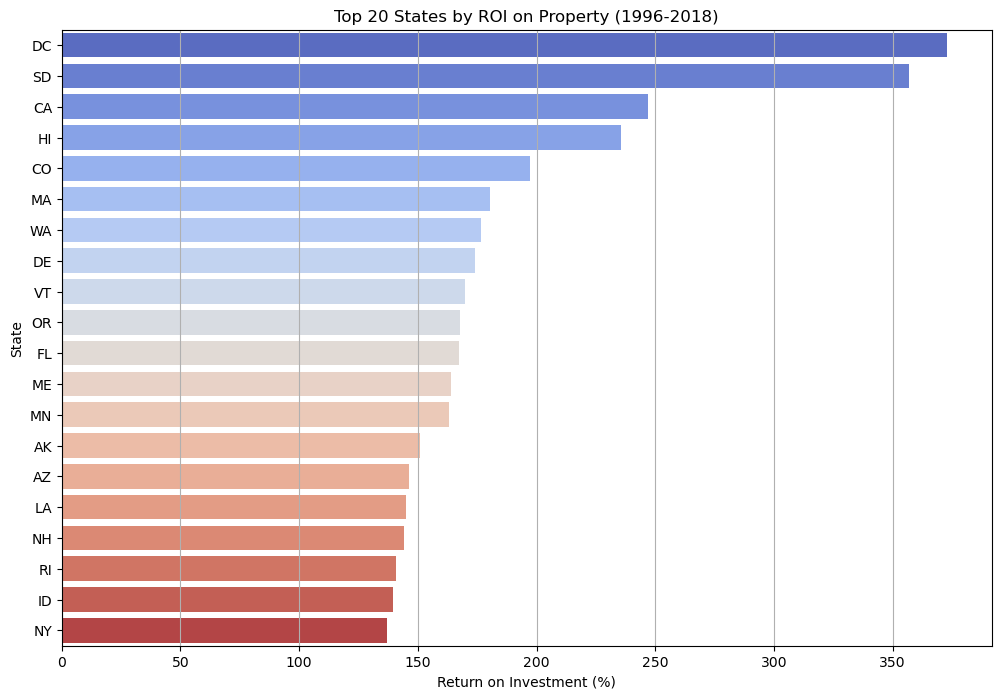

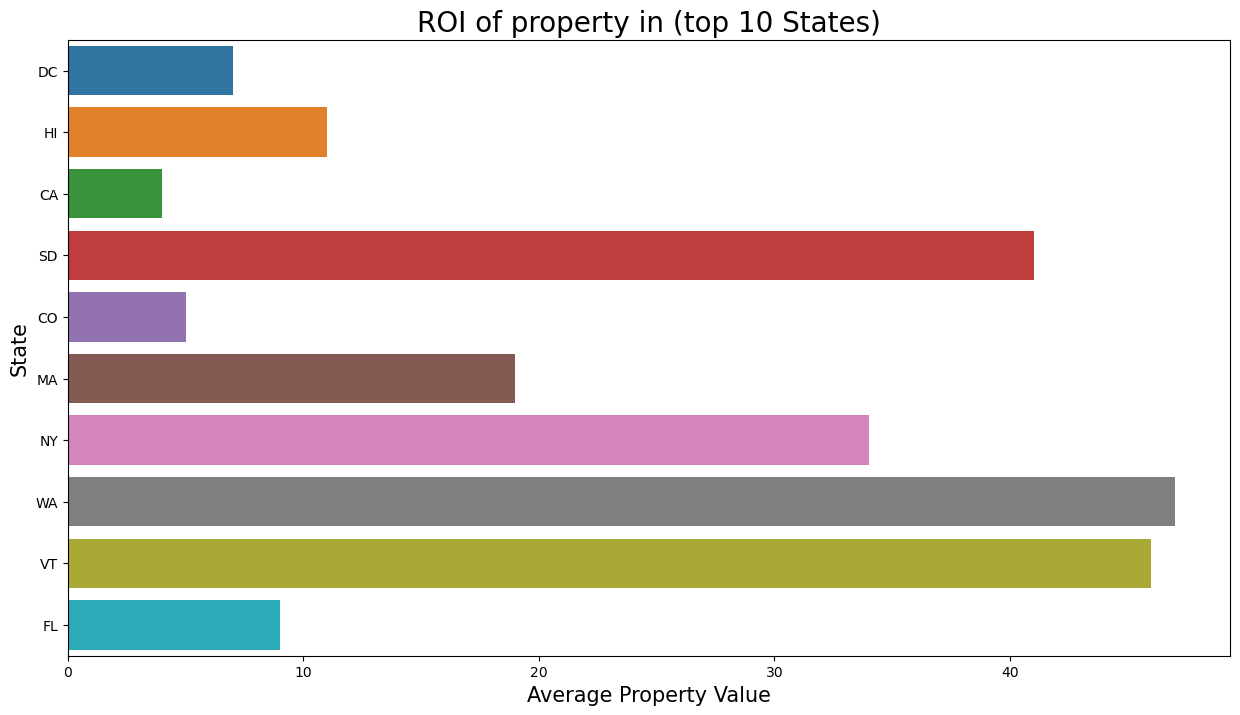

In [77]:
import pandas as pd

# Loading the data
file_path = 'zillow_data.csv'
zillow_data = pd.read_csv(file_path)


# Extracting the first and last monthly data columns for calculation
initial_month = zillow_data.columns[7]  # The first monthly data column
final_month = zillow_data.columns[-1]   # The last monthly data column

# Calculating ROI
zillow_data['ROI'] = ((zillow_data[final_month] - zillow_data[initial_month]) / zillow_data[initial_month]) * 100

# Grouping by state and calculate the mean ROI for each state
state_roi = zillow_data.groupby('State')['ROI'].mean().reset_index()

# Sorting the states by ROI and select the top 20
top_20_states_roi = state_roi.sort_values(by='ROI', ascending=False).head(20)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='ROI', y='State', data=top_20_states_roi, palette='coolwarm')
plt.title('Top 20 States by ROI on Property (1996-2018)')
plt.xlabel('Return on Investment (%)')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

# Specifying the numeric columns for aggregation
numeric_columns = ['ROI']

# Calculatingg the average profit margin for each city using numeric columns
df_avg_value = df.groupby('State')[numeric_columns].mean().reset_index()

# Sorting the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('ROI', ascending=False)

# Selecting the top 10 cities by average profit margin
top_states = df_sorted_states['State'].head(10)

# Filtering the DataFrame to include only t
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=top_states.index, y=top_states, ax=ax)

# setting the title and axis labels
ax.set_title('ROI of property in (top 10 States)',fontsize=20)
ax.set_xlabel('Average Property Value',fontsize=15)
ax.set_ylabel('State',fontsize=15)

# displaying the plot
plt.show();

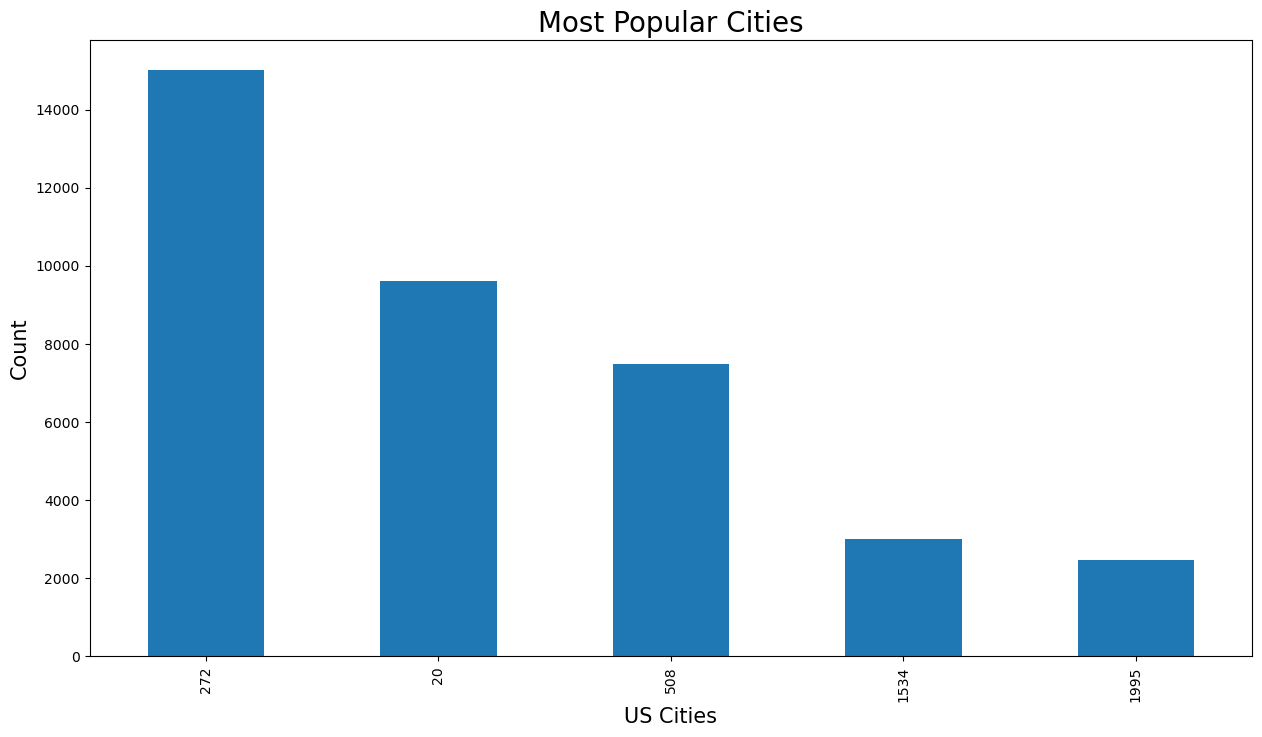

In [78]:
#error
plt.figure(figsize=(15,8))
df.ROI.nlargest()[:10].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

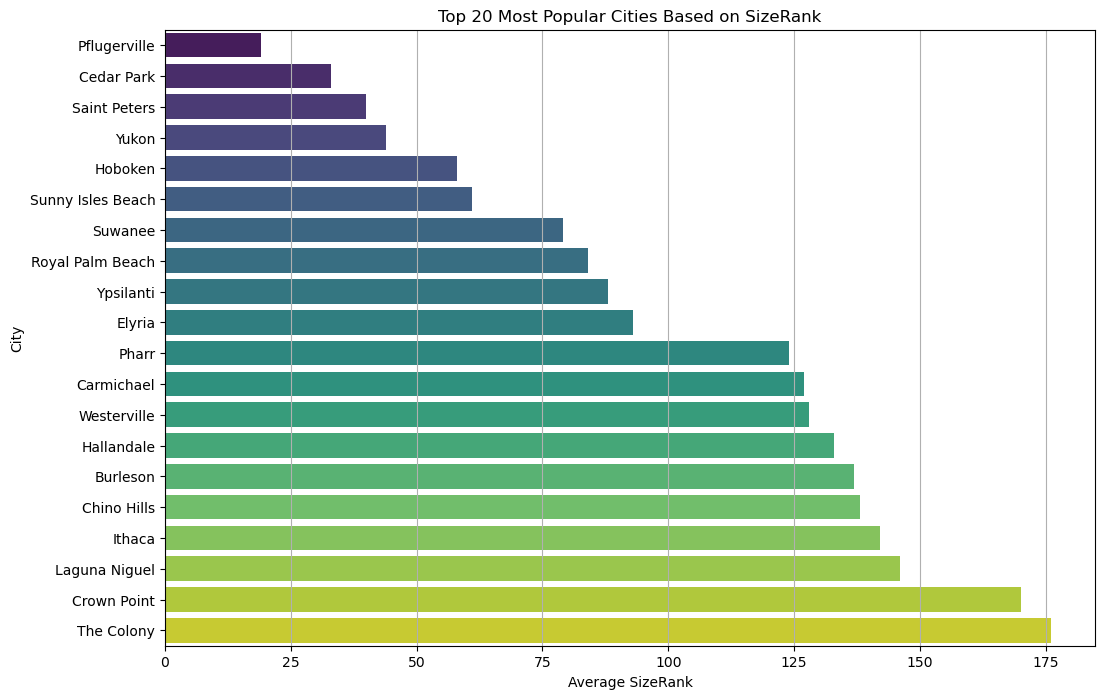

In [79]:
# Group by city and calculate the mean SizeRank for each city
city_rank = zillow_data.groupby('City')['SizeRank'].mean().reset_index()

# Sort the cities by SizeRank and select the top 20
top_20_cities = city_rank.sort_values(by='SizeRank').head(20)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='SizeRank', y='City', data=top_20_cities, palette='viridis')
plt.title('Top 20 Most Popular Cities Based on SizeRank')
plt.xlabel('Average SizeRank')
plt.ylabel('City')
plt.grid(axis='x')
plt.show()


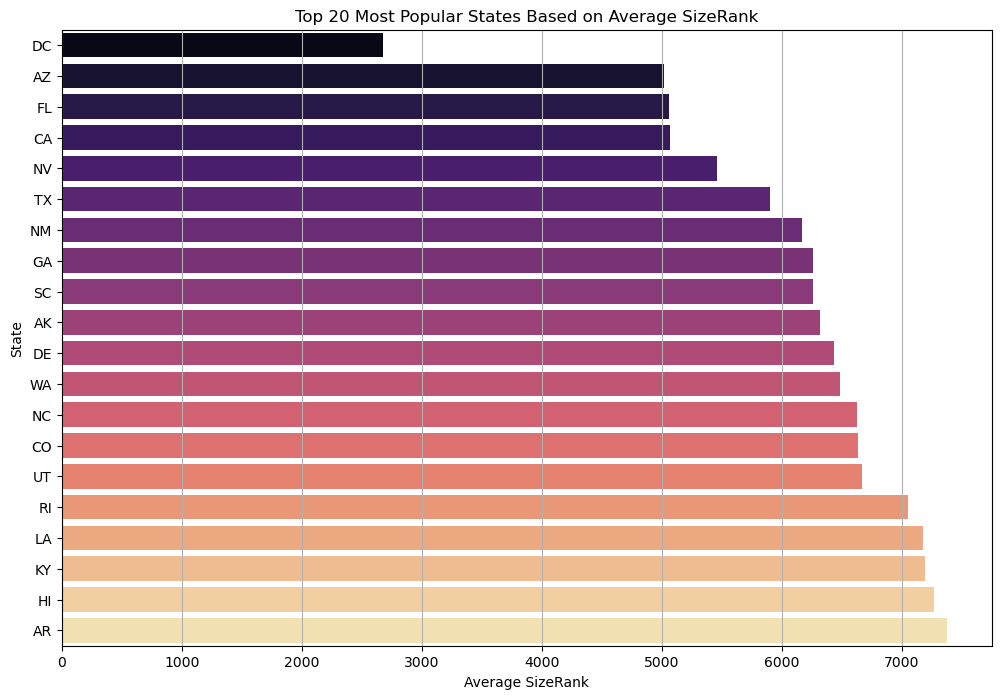

In [80]:
# Similar to cities, we'll use the "SizeRank" as a proxy for the popularity of states.
# We'll group by state and calculate the mean SizeRank for each state to determine their popularity.

# Group by state and calculate the mean SizeRank for each state
state_rank = zillow_data.groupby('State')['SizeRank'].mean().reset_index()

# Sort the states by SizeRank to determine popularity
top_20_states = state_rank.sort_values(by='SizeRank').head(20)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='SizeRank', y='State', data=top_20_states, palette='magma')
plt.title('Top 20 Most Popular States Based on Average SizeRank')
plt.xlabel('Average SizeRank')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()


## Plotting for outliers

This section visualizes outliers in the dataset by creating a boxplot of housing prices over time

In [81]:
#plot_outliers(zillow_data)

In [82]:
def bivariate_analysis(data, x_column, y_column, top_n=10):

    top_categories = data[x_column].value_counts().nlargest(top_n).index
    data_top = data[data[x_column].isin(top_categories)]

    plt.figure(figsize=(10, 8))
    for category in top_categories:
        category_data = data_top[data_top[x_column] == category]
        plt.scatter(category_data[x_column], category_data[y_column], label=category)

    plt.title(f'Scatter plot of top 10 {x_column} against {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=90)
    plt.legend(title=x_column)
plt.show()



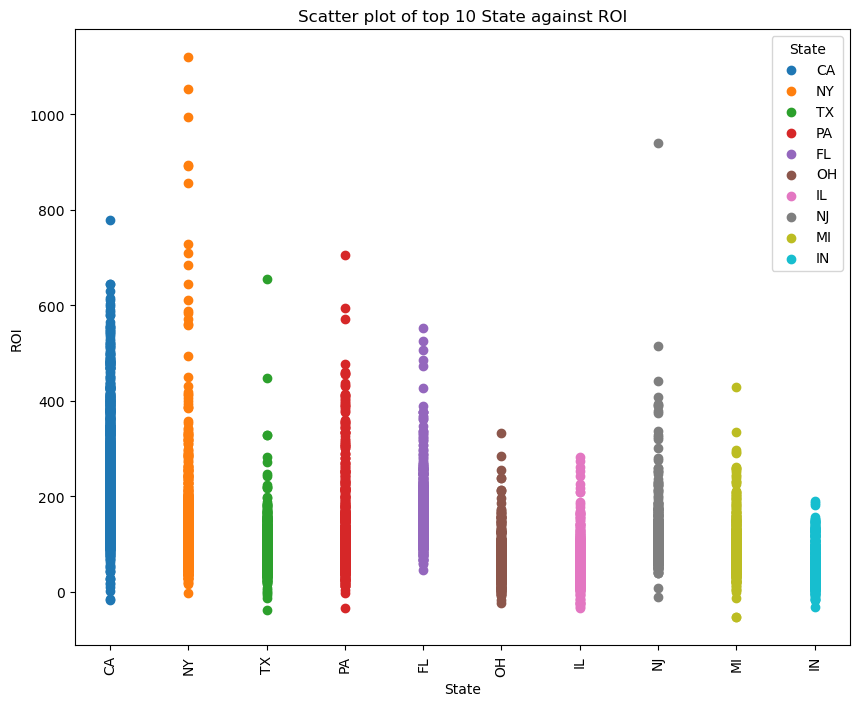

In [83]:
bivariate_analysis(zillow_data, 'State', 'ROI')

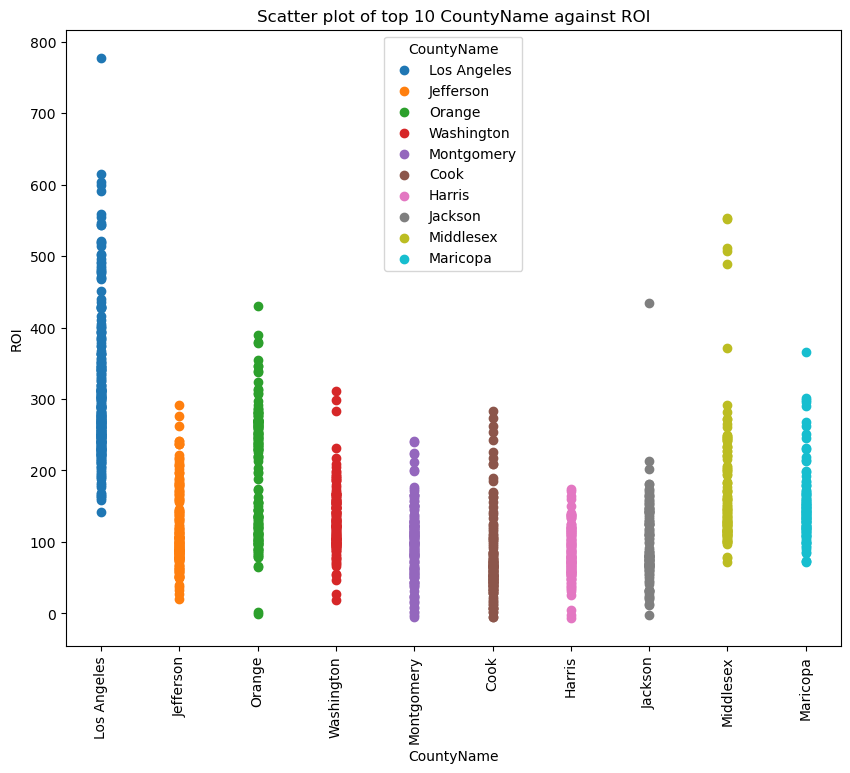

In [84]:
bivariate_analysis(zillow_data, 'CountyName', 'ROI')

### Bivariate Analysis

In [85]:
# Specify the numeric columns for aggregation
numeric_columns = ['Price']

# Calculate the average profit margin for each city using numeric columns
df_avg_value = data.groupby('State')[numeric_columns].mean().reset_index()

# Sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('Price', ascending=False)

# Select the top 10 cities by average profit margin
top_states = df_sorted_states['State'].head(10)

# Filter the DataFrame to include only the top 10 cities
df_top_states = data[data['State'].isin(top_states)].groupby("State")[numeric_columns].mean().sort_values("Price", ascending=False)


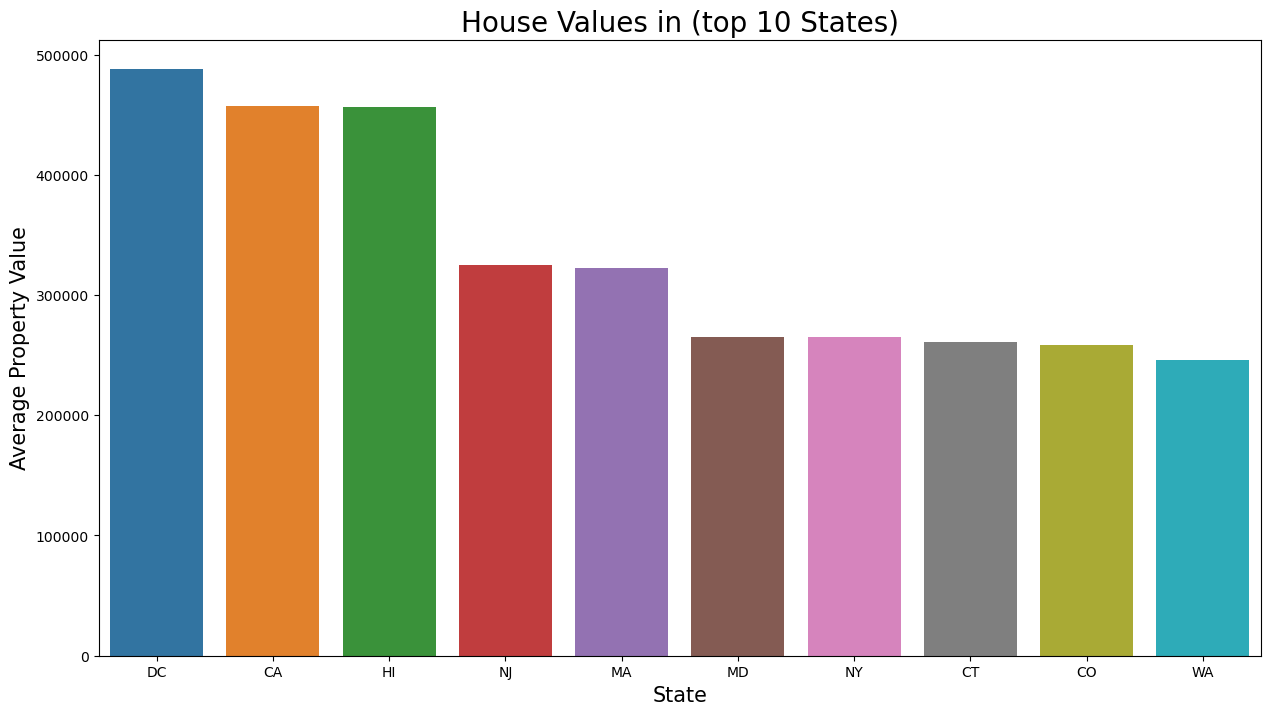

In [86]:
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=df_top_states.index, y=df_top_states.Price,ax=ax)

# set the title and axis labels
ax.set_title('House Values in (top 10 States)',fontsize=20)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Average Property Value',fontsize=15)

# display the plot
plt.show();

### What is the mean percentage return on investment by zipcode?

# Step 5: ARIMA & Modeling

In [87]:
# grouping data by mean %ROI and selecting top 30 zipcodes
grouped1 = data.groupby('Zipcode')
state_values1 = grouped1['%ROI'].mean()
state_values_df1 = state_values1.reset_index(name='% ROI')
state_values_df1 = state_values_df1.sort_values(by='% ROI', ascending=False)
top_thirty_zipcodes_df_roi = state_values_df1.head(10)

As observed, the percentage of return on investents for the top five zipcodes had a crash in 2008 to 2012 and then from there they all have an upward linear trend.

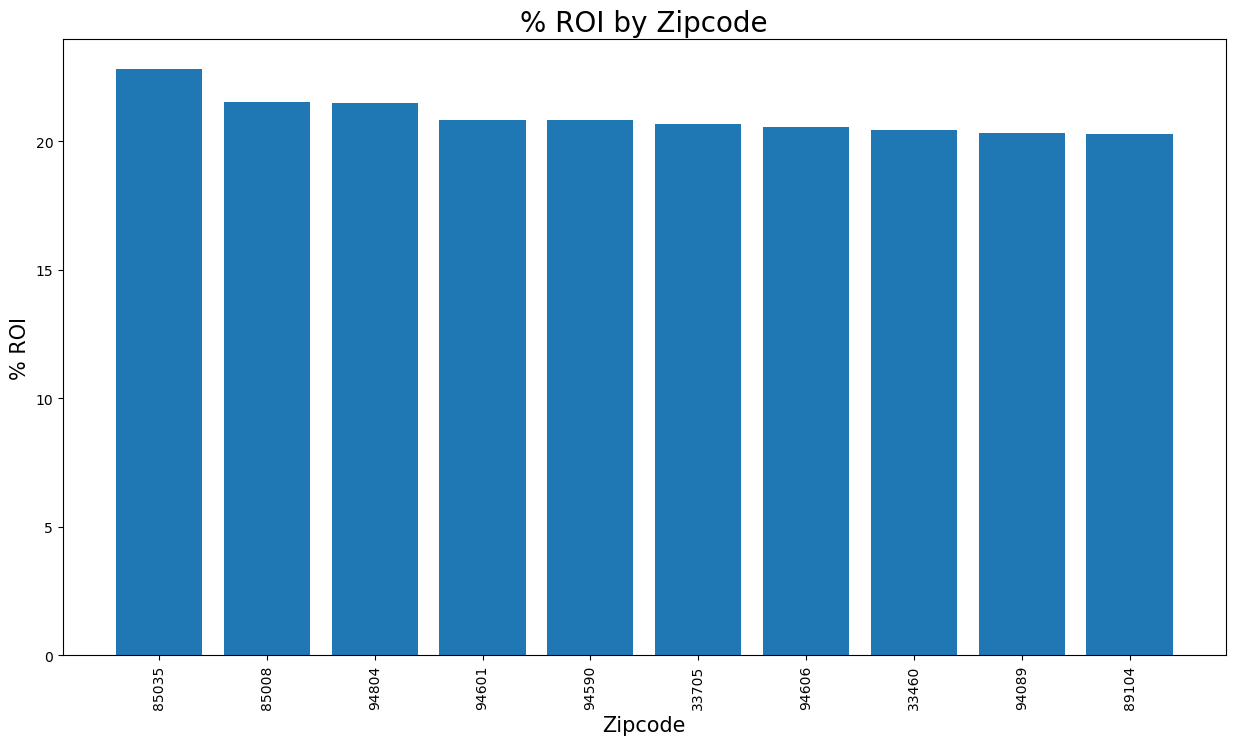

In [88]:
# plotting the %ROI by zipcode
plt.figure(figsize=(15,8))
plt.bar(top_thirty_zipcodes_df_roi['Zipcode'], top_thirty_zipcodes_df_roi['% ROI'])
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('% ROI',fontsize=15)
plt.title('% ROI by Zipcode',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [89]:
# creating a data series to check the prices of houses over time
ts = data.copy()
ts.set_index("Date",inplace=True)
ts = ts["Price"]

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\2223080354.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts.resample("A").mean().plot()


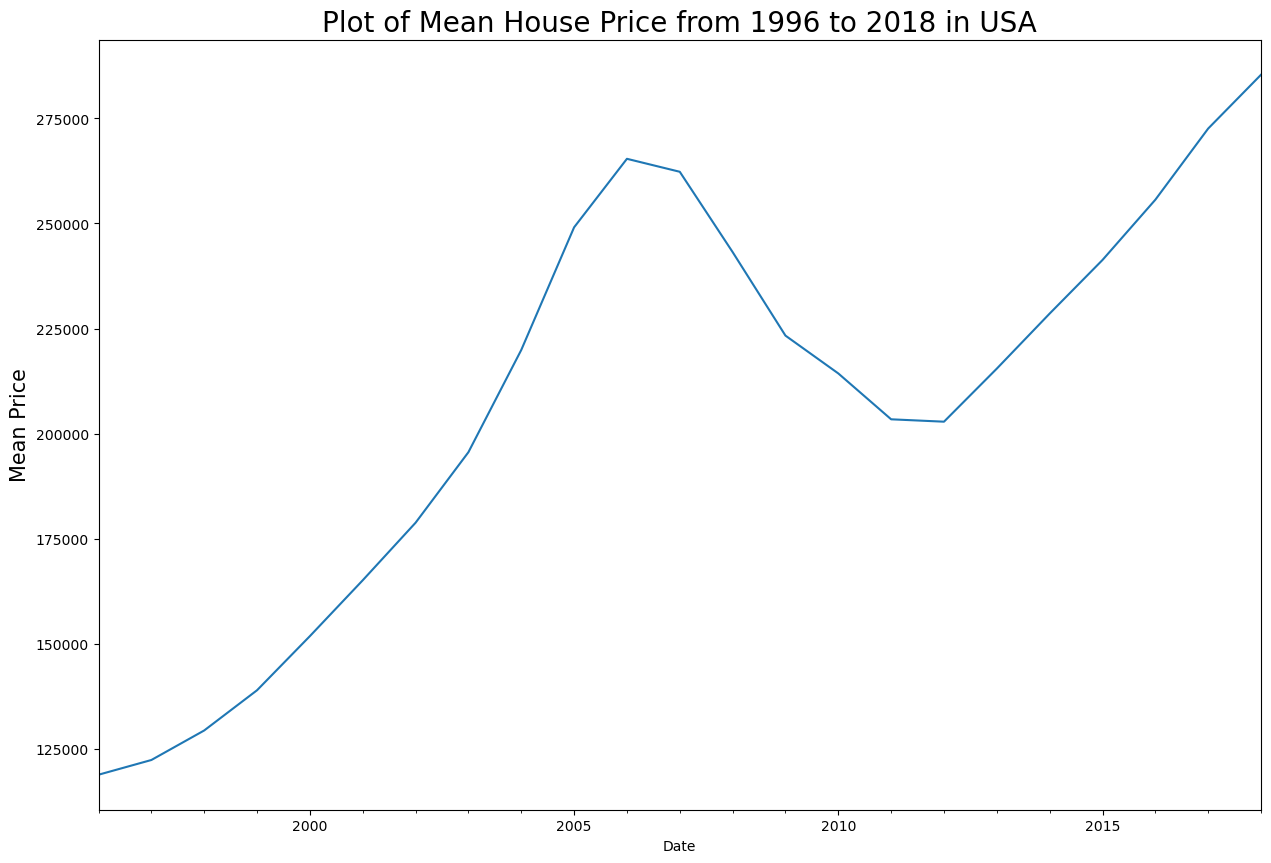

In [90]:
# plotting mean house price
plt.figure(figsize=(15,10))
ts.resample("A").mean().plot()
plt.ylabel("Mean Price",fontsize=15)
plt.title("Plot of Mean House Price from 1996 to 2018 in USA",fontsize=20);

## Data Preprocessing

When working with time series models, it is assumed that the data is stationary, which means that for each lag, the mean, variance, and autocorrelation of the data do not change over time.

Stationary Time Series improves model development efficiency. The Dickey Fuller test and the Rolling mean will be used to verify the data's stationary state prior to modelling.

If the data is not stationary, differencing will be used to ensure it is.

From this graph, zipcode 85035 seems to be the most profitable zipcode at 22.8% ROI from 2012 to 2018.

### What is the change in house prices from 1996 to 2018?

When working with time series models, it is assumed that the data is stationary, which means that for each lag, the mean, variance, and autocorrelation of the data do not change over time.

Stationary Time Series improves model development efficiency. The Dickey Fuller test and the Rolling mean will be used to verify the data's stationary state prior to modelling.

If the data is not stationary, differencing will be used to ensure it is.

In [91]:
# Filtering data for the top 5 zip codes based on %ROI
zipcode = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcode)]

# Converting the 'Date' column to datetime format
top_5['Date'] = pd.to_datetime(top_5['Date'])

# Selecting only numeric columns for aggregation
numeric_columns = top_5.select_dtypes(include=[np.number]).columns

# Grouping data by date and zipcode, and calculate the mean for each group
grouped_5 = top_5.groupby(['Date', 'Zipcode'])[numeric_columns].mean().reset_index()

# Filtering the grouped data to include only dates from "2005-01-01" onwards
final_df = grouped_5[grouped_5['Date'] >= "2005-01-01"]

final_df.head()


C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\3915295823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['Date'] = pd.to_datetime(top_5['Date'])


,Date,Zipcode,RegionID,SizeRank,%ROI,ROI price,Price
525,2005-01-01,85008,94724.0,475.0,21.534560,153799.0,147400.0
526,2005-01-01,85035,94751.0,1947.0,22.821813,114099.0,NaN
527,2005-01-01,94590,97795.0,1240.0,20.822042,255199.0,368800.0
528,2005-01-01,94601,97803.0,1478.0,20.829750,384599.0,398200.0
529,2005-01-01,94804,97850.0,1854.0,21.468835,332699.0,445300.0


Creating a dataframe to check the change over price in time for the top five zipcodes

In [92]:
TS_zc5 = final_df.drop(['RegionID', 'SizeRank', '%ROI', 'ROI price'],axis=1)

TS_zc5 = TS_zc5.set_index('Date')
print('Time series data for the 5 zipcodes:\n',TS_zc5.head())

#Create individualized time series for each zipcode.
#List containing the 5 different time series.
df_ts = []
for zipcode in TS_zc5.Zipcode.unique():
    # Create separate dataframes for each zipcode with a monthly frequency.
    df_zip = TS_zc5[TS_zc5['Zipcode']==zipcode].asfreq('MS')
    df_ts.append(df_zip)
print('\nZipcode 48894 time series:')
df_ts[0].head()

Time series data for the 5 zipcodes:
            Zipcode     Price
Date                        
2005-01-01   85008  147400.0
2005-01-01   85035       NaN
2005-01-01   94590  368800.0
2005-01-01   94601  398200.0
2005-01-01   94804  445300.0

Zipcode 48894 time series:


,Zipcode,Price
Date,,
2005-01-01,85008,147400.0
2005-02-01,85008,150700.0
2005-03-01,85008,154100.0
2005-04-01,85008,157900.0
2005-05-01,85008,161900.0


C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\169415992.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_ts[i].Price.plot(label=df_ts[i].Zipcode[0],figsize=(15,8))
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\169415992.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_ts[i].Price.plot(label=df_ts[i].Zipcode[0],figsize=(15,8))
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\169415992.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

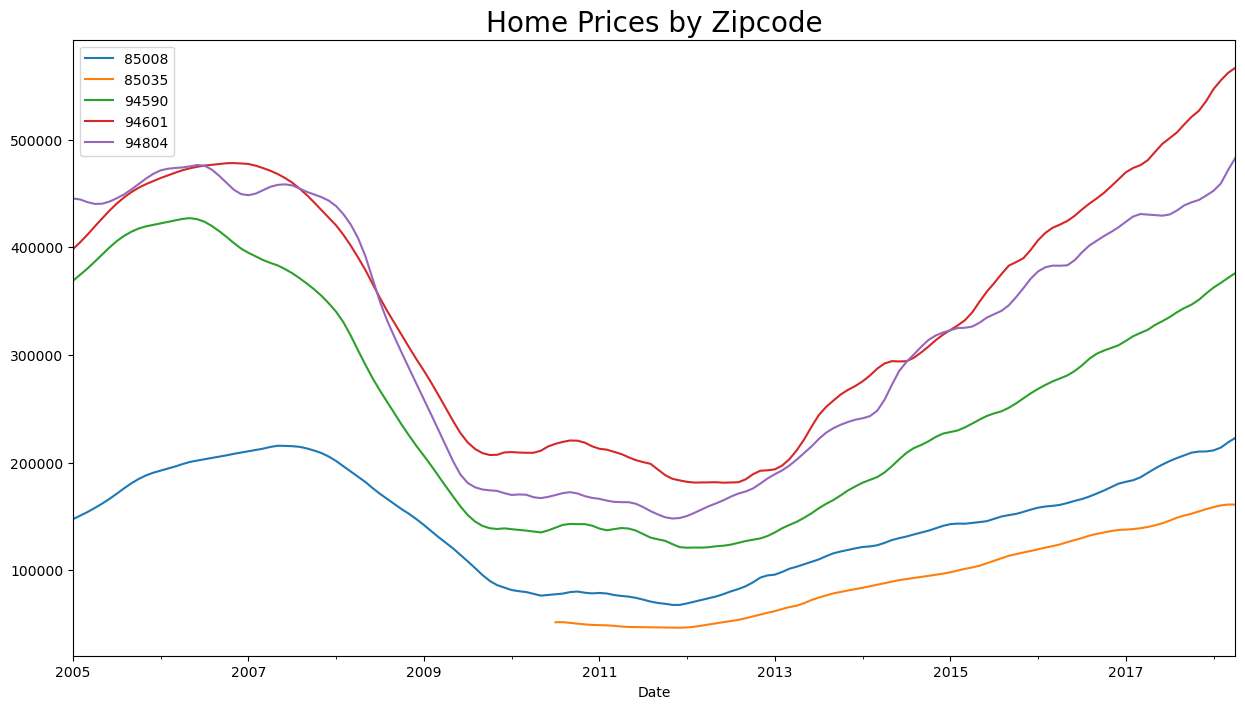

In [93]:
# plotting home prices by zipcodes
for i in range(5):
    df_ts[i].Price.plot(label=df_ts[i].Zipcode[0],figsize=(15,8))
    plt.legend()
plt.title("Home Prices by Zipcode",fontsize=20); 

It can be observed like before that there was a dip in the prices due to the 2008 market crash and then the prices continued to rise over time from 2012 all the way to 2018.

A new column called ret is created to check the returns per month

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\4048838521.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1
C:\Users\PeteD\AppData\Local\Temp\ipykernel_417

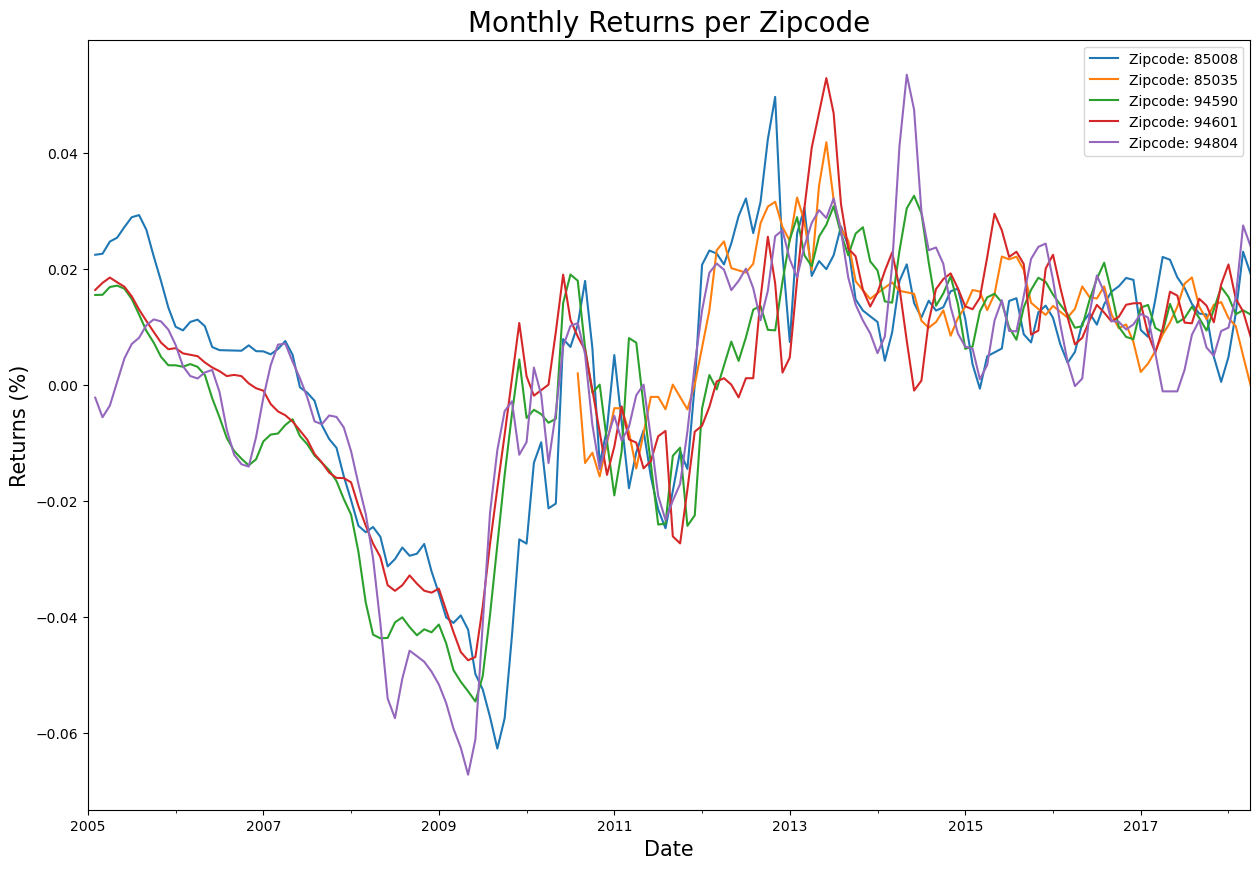

In [94]:
# creating a column called "ret" representing monthly returns on investment
for zc in range(len(df_ts)):
    df_ts[zc]['ret']=np.nan*len(df_ts[zc])
    for i in range(len(df_ts[zc])-1):
        df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1
        
#Plot the monthly returns of each zipcode
for i in range(len(df_ts)):
    df_ts[i].ret.plot(figsize=(15,10),label=f"Zipcode: {df_ts[i].Zipcode[0]}")
    plt.title(f'Monthly Returns per Zipcode',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Returns (%)',fontsize=15)
    plt.legend(loc='best')

# Rolling Mean to check for stationarity

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\587728056.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}',fontsize=20)


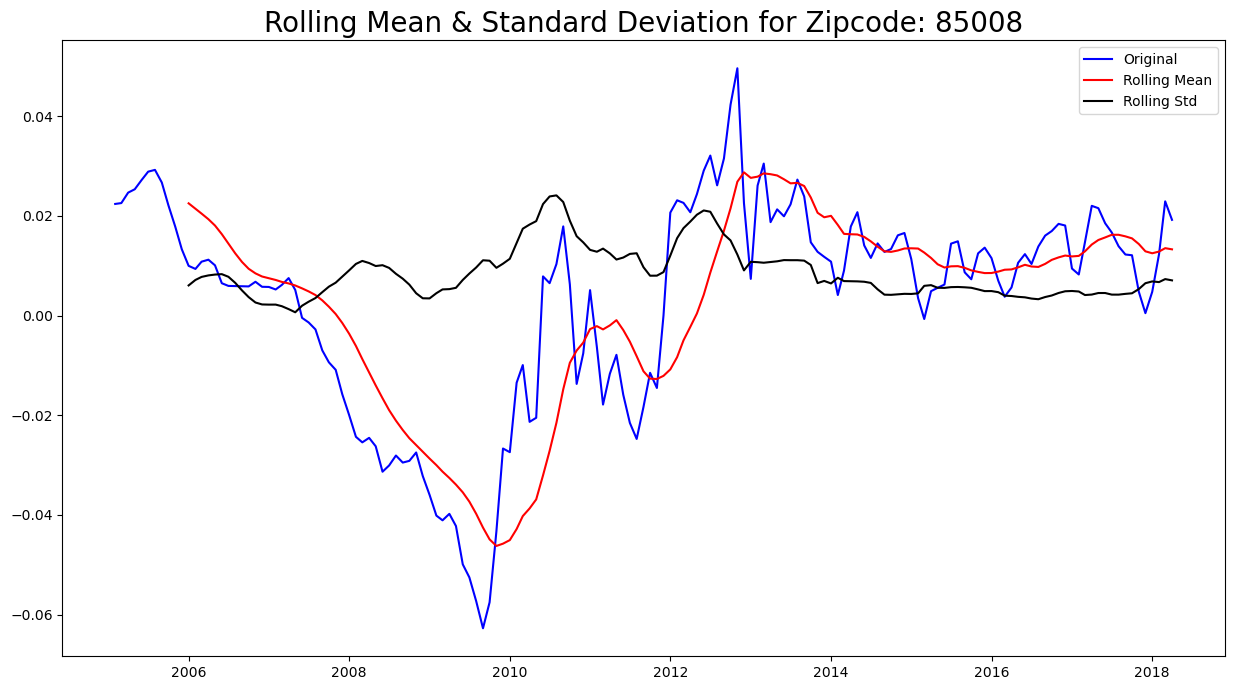

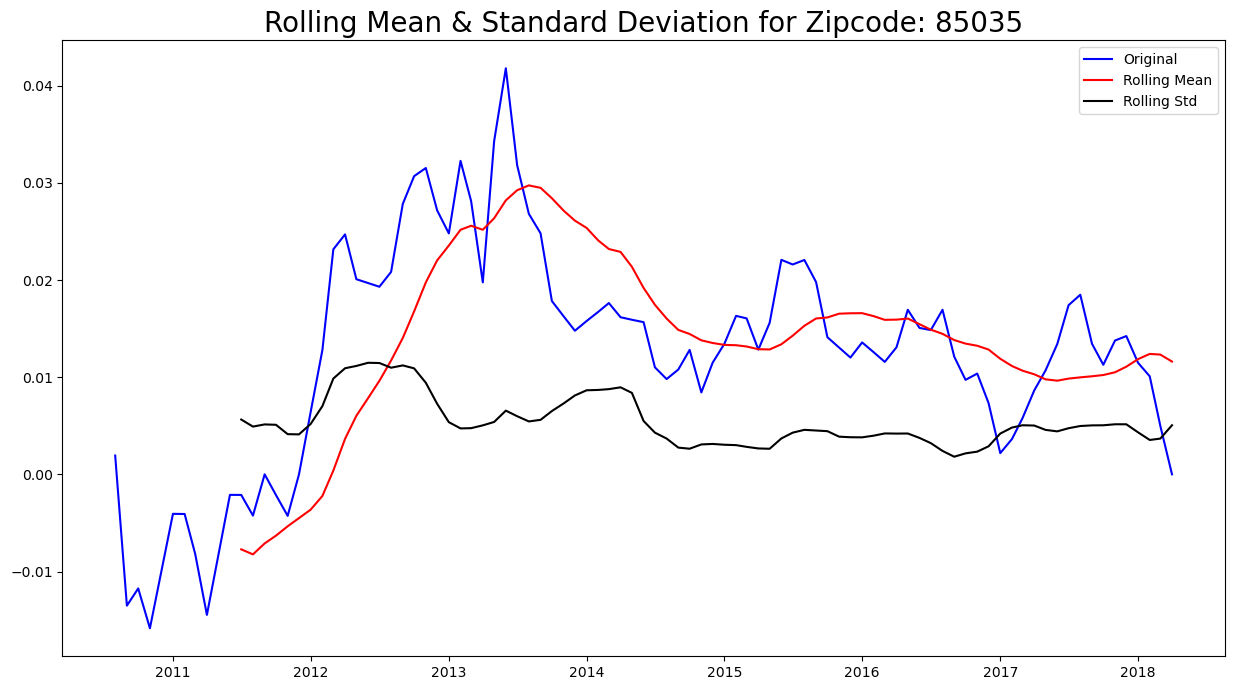

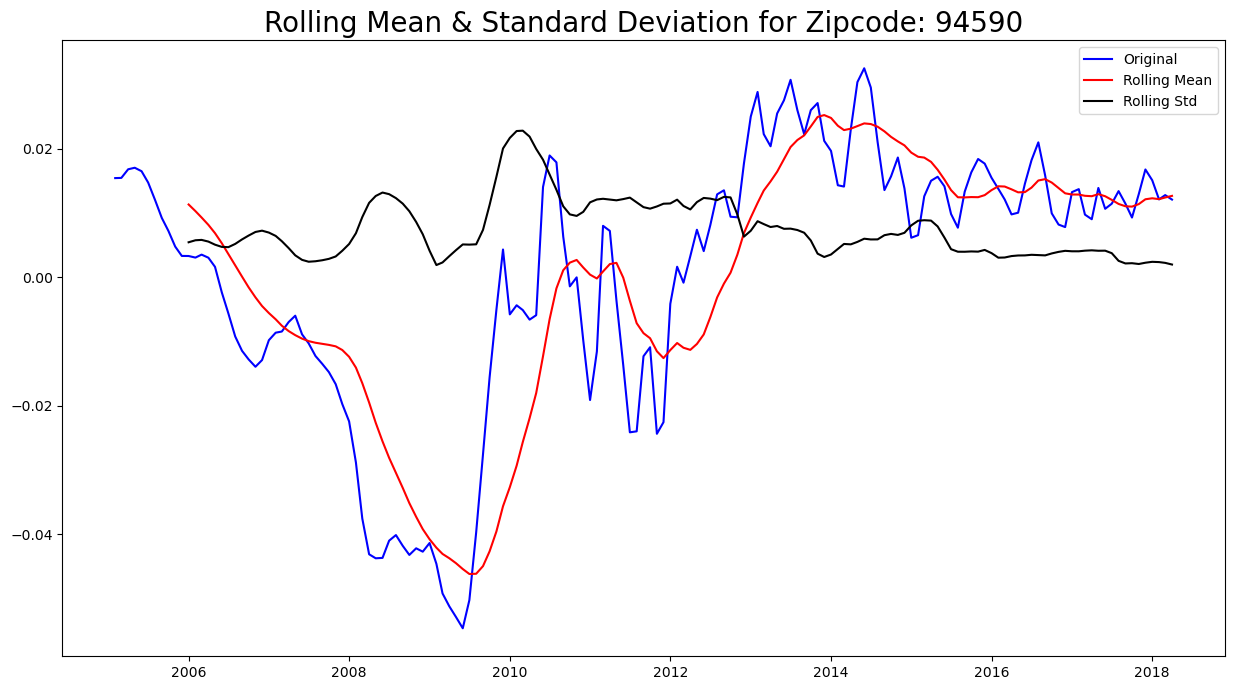

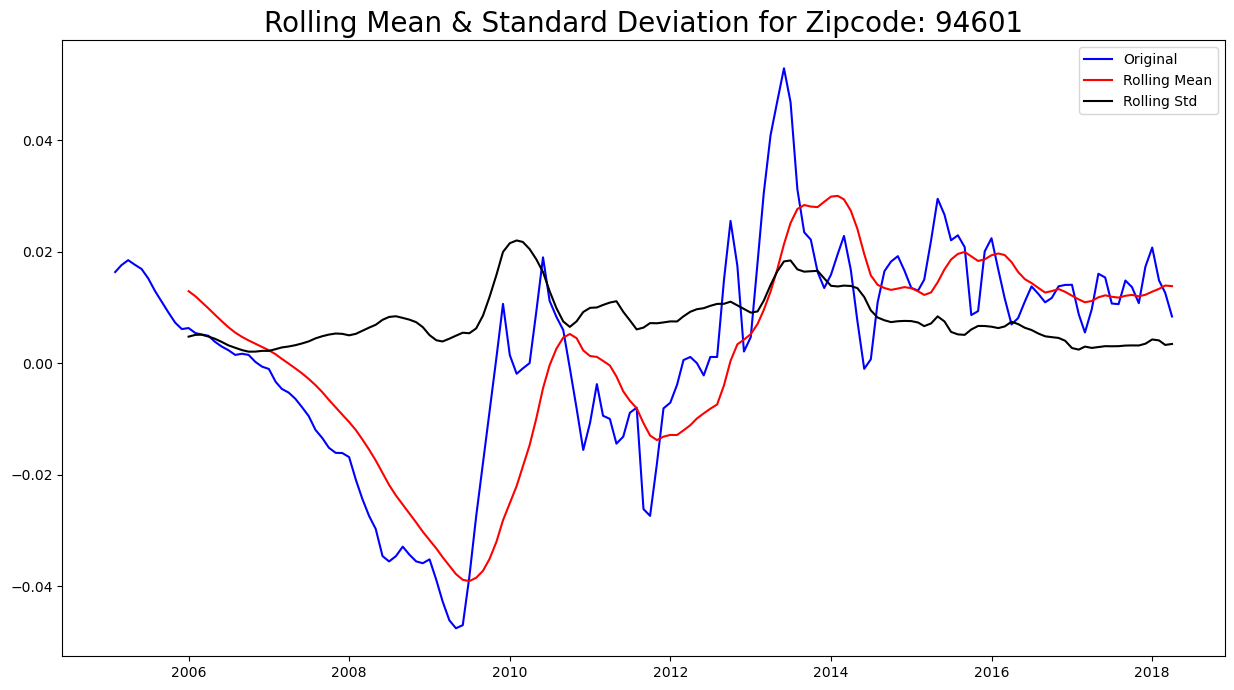

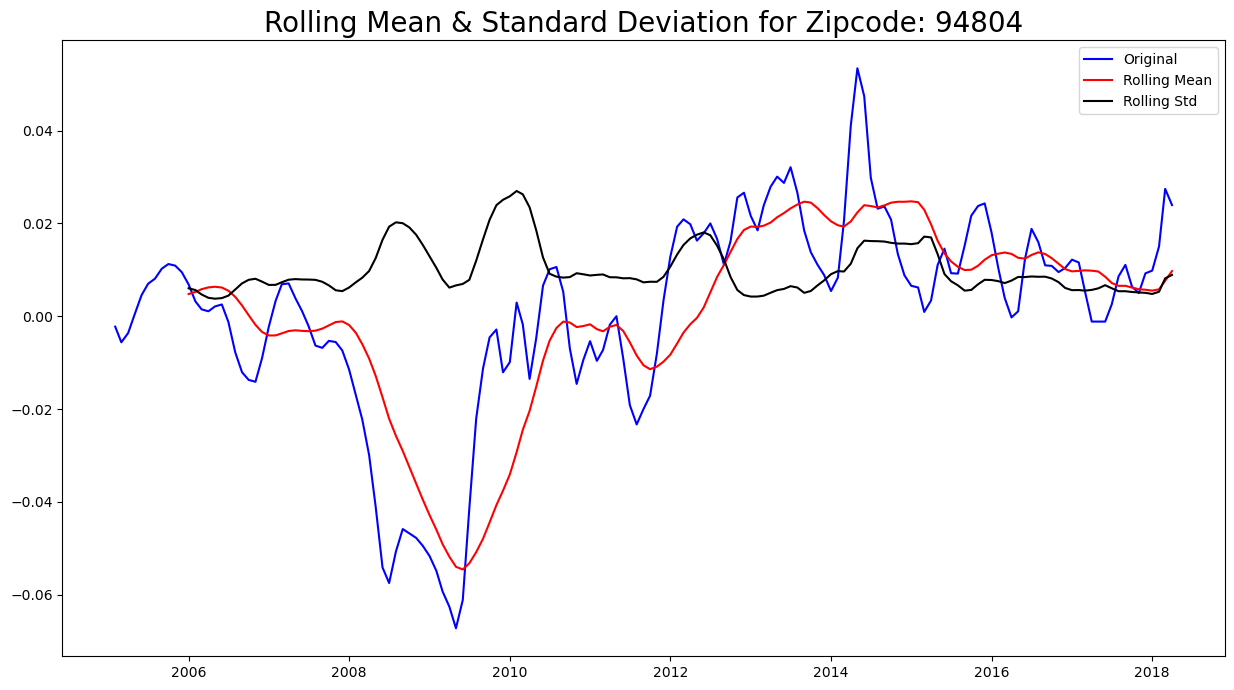

In [95]:
#Plot each of the zipcodes’ returns with their respective rolling mean and rolling standard deviation.
#Visually test for stationarity.
for i in range(len(df_ts)):
    rollingmean = df_ts[i].ret.rolling(window = 12, center = False).mean()
    rollingstd = df_ts[i].ret.rolling(window = 12, center = False).std()
    fig = plt.figure(figsize=(15,8))
    original = plt.plot(df_ts[i].ret, color="blue",label="Original")
    mean = plt.plot(rollingmean, color="red", label="Rolling Mean")
    std = plt.plot(rollingstd, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}',fontsize=20)
    plt.show()

From the graphs above there are some states that exhibit non-stationarity but to be certain, a Dickey Fuller test is performed.

In [96]:
# performing Dicky-fuller test for stationarity
for i in range(5):
    results = adfuller(df_ts[i].ret.dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 85008
p-value: 0.6295372473847562
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 85035
p-value: 0.01913314918426731
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94590
p-value: 0.3731739915627176
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94601
p-value: 0.29716340879911474
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94804
p-value: 0.36736547945857545
Fail to reject the null hypothesis. Data is not stationary.



C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\1919551607.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\1919551607.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\1919551607.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

In [97]:
# differencing the non stationary zip codes
for i in [0,2,3,4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(df_ts[i].ret.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 85008
p-value: 0.00014841526602510512
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94590
p-value: 0.013185460591181607
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94601
p-value: 0.010223197023988488
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94804
p-value: 1.9697301465546948e-07
Reject the null hypothesis. Data is stationary.



C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\1468541083.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\1468541083.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\1468541083.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

## Model Development

There will be five distinct models for each of the top five zipcodes to forecast prices and provide investors with an informed decision, as the goal is to determine which zipcodes are the best to invest in. 

In [98]:
# creating individual time series 
ts_85035 = df_ts[1].ret.dropna()
ts_85008 = df_ts[0].ret.diff().dropna()
ts_94590 = df_ts[2].ret.diff().dropna()
ts_94601 = df_ts[3].ret.diff().dropna()
ts_94804 = df_ts[4].ret.diff().dropna()

In [101]:
# defining a function that plots acf and pacf plots
def acf_pacf(df,alags=40,plags=40):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

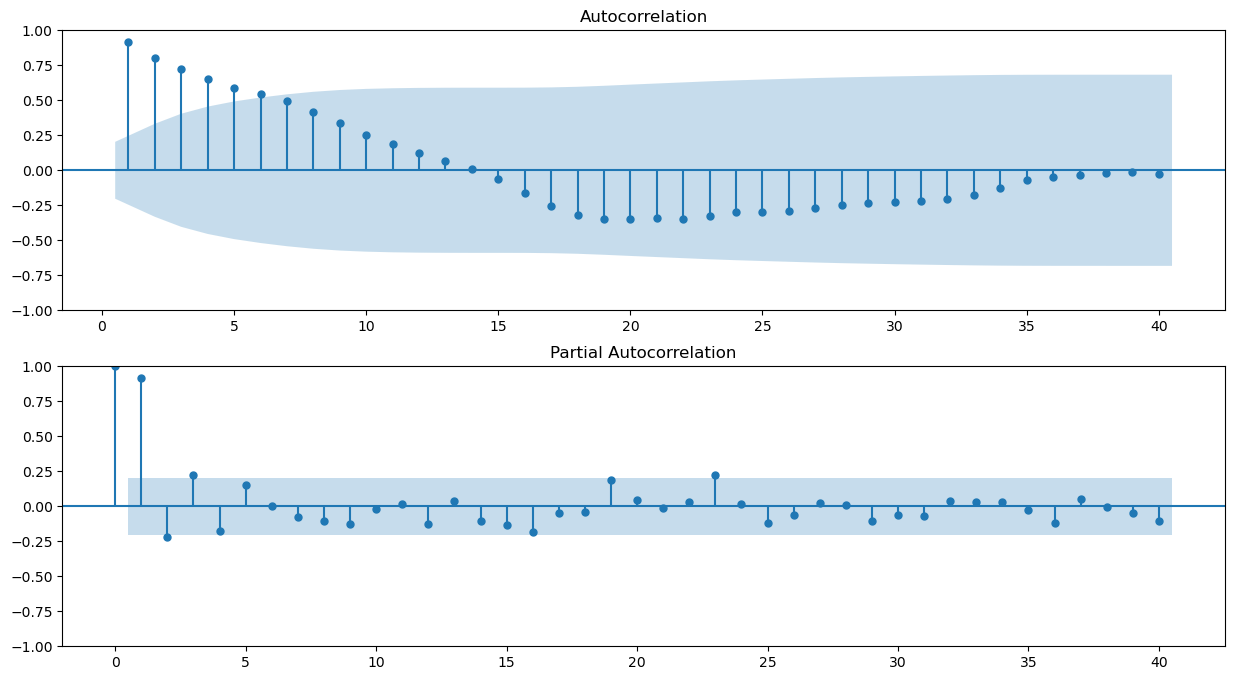

In [102]:
# plotting acf and pacf for zipcode 85035
acf_pacf(ts_85035)

In [103]:
# using auto arima to find the best p,d,q for our model
model = pm.auto_arima(ts_85035, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-743.807, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-564.435, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-739.754, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-666.336, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-494.111, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-745.915, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-712.127, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-746.637, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-747.904, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-741.329, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-746.897, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-744.455, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-735.084, Time=0.06 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] i

In [104]:
#splitting the data into train and test
train_85035 = ts_85035[:'2015-01']
test_85035 = ts_85035['2015-02':]

Fitting an ARIMA Model on the training series. The parameters to be used will be gotten from the AUTO ARIMA model above.

In [105]:
# initializing ARIMA model
ARIMAmodel = ARIMA(train_85035, order=(2, 0, 1))

In [106]:
# fit the model
ARIMAmodel = ARIMAmodel.fit()

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                   54
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 210.348
Date:                Thu, 11 Apr 2024   AIC                           -410.696
Time:                        21:23:11   BIC                           -400.751
Sample:                    08-01-2010   HQIC                          -406.860
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0115      0.008      1.456      0.145      -0.004       0.027
ar.L1          0.4476      0.245      1.826      0.068      -0.033       0.928
ar.L2          0.4028      0.242      1.661      0.0

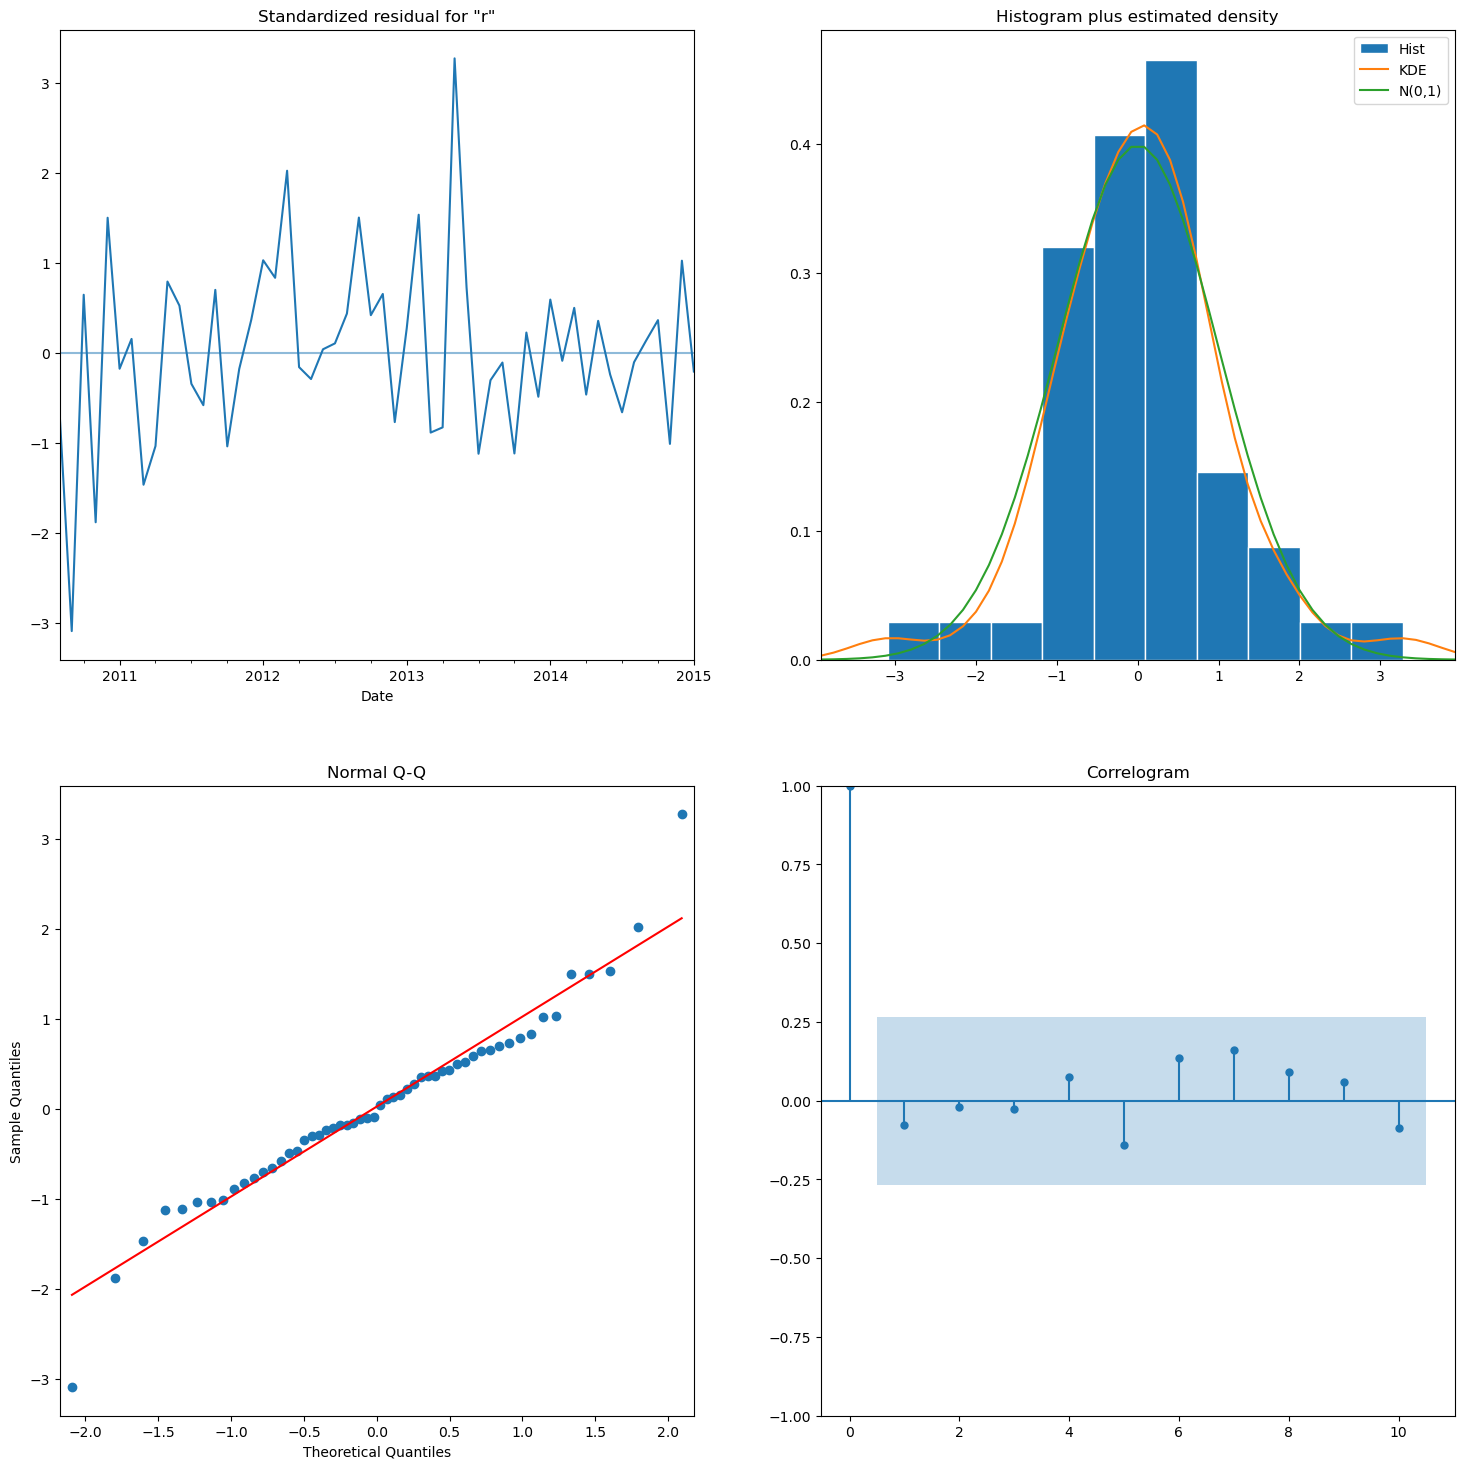

In [107]:
# printing the model summary
print(ARIMAmodel.summary())
ARIMAmodel.plot_diagnostics(figsize=(18,18))
plt.show()

To meet the normality assumptions, the residuals must not be correlated and have a normal distribution. For this case:
  1. The residuals are normally distributed because, as the qq-plot on the bottom left illustrates, they follow a linear trend line.
  2. There are minimal correlations with their lagged version, as indicated by the correlogram plot on the bottom left. This indicates that our series doesn't exhibit any clear seasonality.
  3. The residuals are positively distributed, as indicated by the bell curve on the histogram.

In [108]:
# creating a table of the upper and lower limits
pred = ARIMAmodel.get_prediction(start=pd.to_datetime('2015-02'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf.head()

,lower ret,upper ret
2015-02-01,0.002119,0.020934
2015-03-01,-0.003075,0.027644
2015-04-01,-0.006059,0.029773
2015-05-01,-0.008087,0.032028
2015-06-01,-0.009654,0.033353


# Testing the model's performance

Plotting the training data against the test data

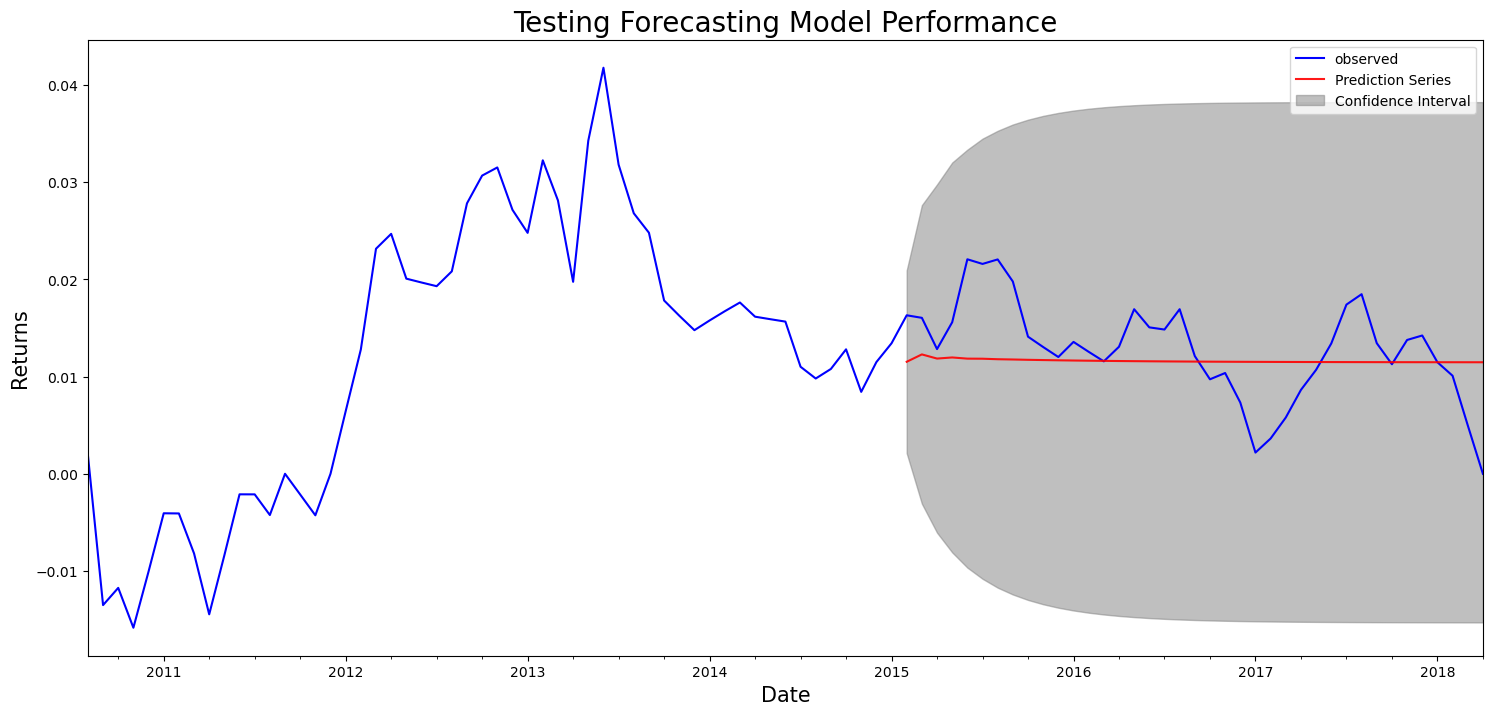

In [109]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = ts_85035.plot(label='observed',c="blue")

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9,c="red")

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='gray', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Returns',fontsize=15)
ax.set_title('Testing Forecasting Model Performance',fontsize=20)
plt.legend()

plt.show()

# Model Evaluation

In [110]:
#Getting the rmse for the model
MSE(test_85035,pred.predicted_mean,squared=False)

0.005085459275472773

This tells us that our the monthly returns would be off by 0.005% if this model is used. Which is a good thing since it is not off by much.

#### **Forecasting for the next 3 years**

In [111]:
# Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
ARIMA_MODEL = ARIMA(ts_85035, 
                    order=(2,0,1), 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                   93
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 381.560
Date:                Thu, 11 Apr 2024   AIC                           -753.119
Time:                        21:24:22   BIC                           -740.565
Sample:                    08-01-2010   HQIC                          -748.054
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0134      0.005      2.623      0.009       0.003       0.023
ar.L1          0.6556      0.124      5.294      0.000       0.413       0.898
ar.L2          0.2014      0.129      1.559      0.1

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [112]:
# Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction.head()

,lower,upper,prediction
2018-05-01,-0.006573,0.007681,0.000554
2018-06-01,-0.009791,0.014355,0.002282
2018-07-01,-0.010860,0.017912,0.003526
2018-08-01,-0.011349,0.020729,0.004690
2018-09-01,-0.011501,0.022908,0.005703


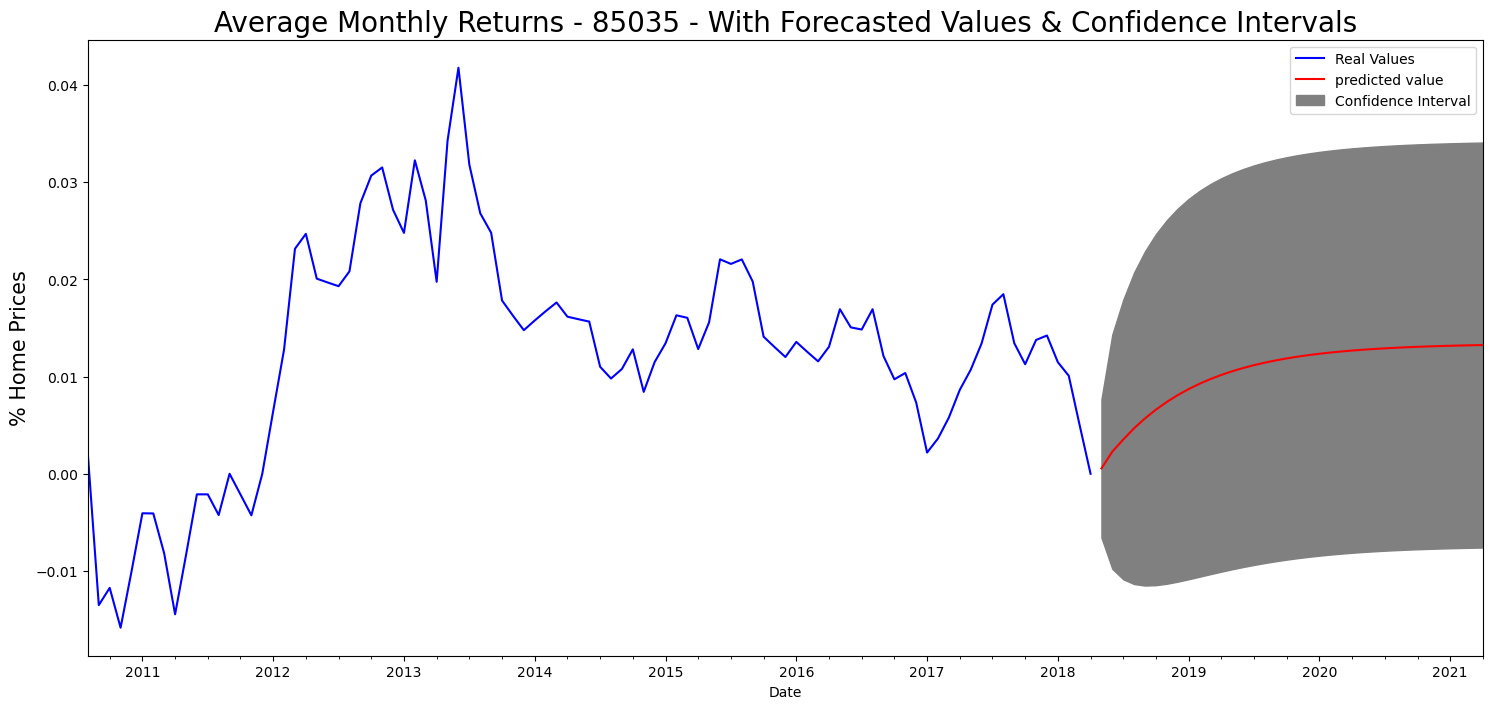

In [113]:
# Plotting our Forecast

fig, ax = plt.subplots()
ts_85035.plot(ax=ax,label='Real Values',c="blue")


future_prediction['prediction'].plot(ax=ax,label='predicted value',c="red")

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'], 
                y2= future_prediction['upper'],color='gray',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("% Home Prices",fontsize=15)
plt.title('Average Monthly Returns - 85035 - With Forecasted Values & Confidence Intervals',fontsize=20)
plt.show()

### **Forecasting for every zipcode**

In [114]:
zip_predictions = {}

# Creating a for loop to forecast for every zipcode
for i in range(len(df_ts)):

    # selecting every individual series
    series = df_ts[i]["Price"]
    
    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]
    
    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]
    
    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series, 
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)
   
    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = SARIMAX(recent_series, 
                          order= auto_model.order, 
                          seasonal_order= auto_model.seasonal_order, 
                          enforce_stationarity=False, 
                          enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['Price'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction'] 
    
    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1128.187, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1127.998, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1128.514, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1129.499, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1088.949, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1086.951, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1088.950, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1079.466, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1074.058, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1090.009, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1190.708, T

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\20504438.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\20504438.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])


 ARIMA(1,2,0)(0,0,0)[0]             : AIC=886.696, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=886.611, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=888.481, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=887.303, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.123 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1039.028, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1028.674, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1025.075, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1024.273, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1026.272, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1026.271, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1026.196, Time=0.04 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.268 seconds
Performing stepwise 

C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\20504438.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])
C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\20504438.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1091.763, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1099.319, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1109.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1114.150, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1093.748, Time=0.00 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.219 seconds


C:\Users\PeteD\AppData\Local\Temp\ipykernel_41776\20504438.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])


# Conclusion and Recommendations

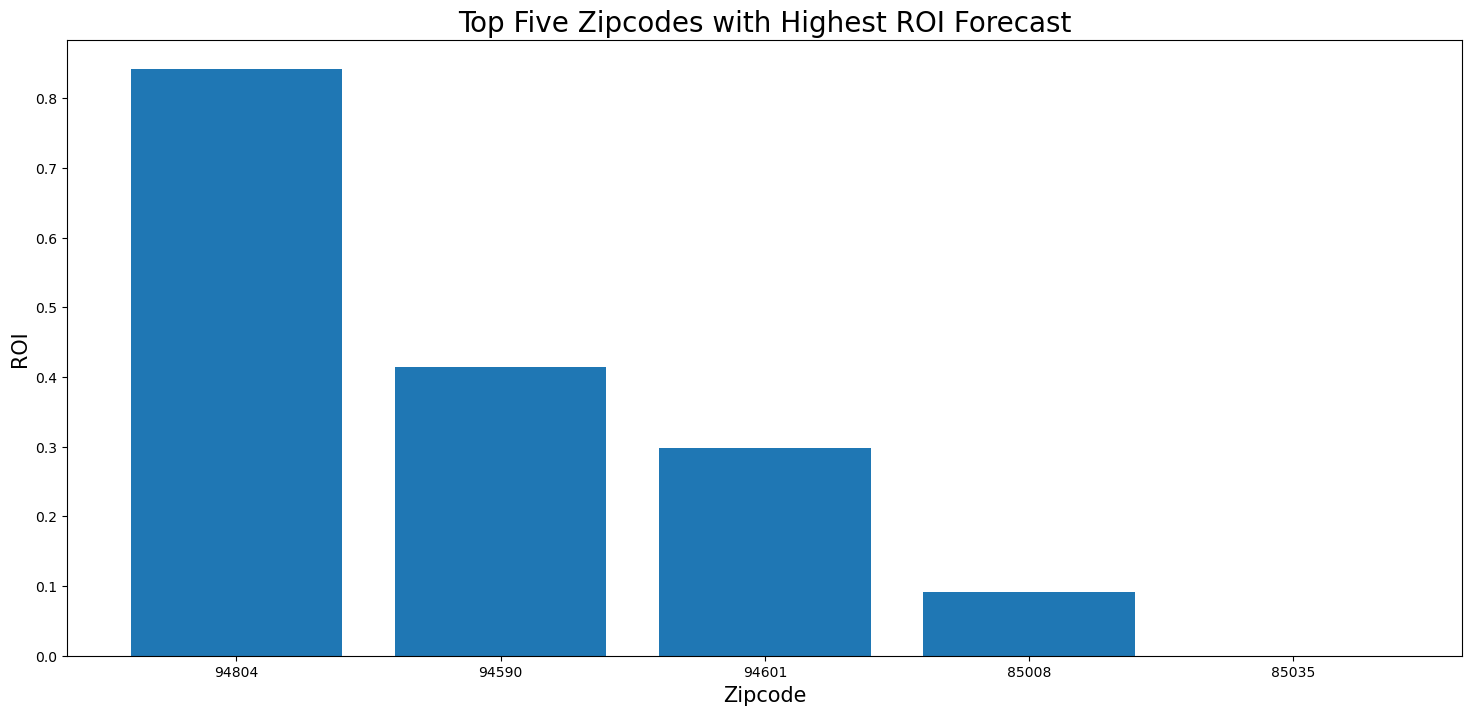

In [115]:
# Get the top five zipcodes with the highest ROI
top_zipcodes = sorted(zip_predictions, key=zip_predictions.get, reverse=True)[:5]

# Create a list of ROI values for the top five zipcodes
roi_values = [zip_predictions[zipcode] for zipcode in top_zipcodes]

# Create a bar graph of the top five zipcodes and their corresponding ROI values
plt.bar(top_zipcodes, roi_values)
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('ROI',fontsize=15)
plt.title('Top Five Zipcodes with Highest ROI Forecast',fontsize=20)
plt.show()

From the above graph the zipcode of 94804 has the highest ROI forecast so it would be beneficial if the investor invested in this zipcode.

In [116]:
zip_roi_dict = {zipcode: zip_predictions[zipcode] for zipcode in top_zipcodes}

# Convert the dictionary to a pandas dataframe and sort it by ROI values in descending order
zip_roi_df = pd.DataFrame.from_dict(zip_roi_dict, orient='index', columns=['% ROI'])
zip_roi_df = zip_roi_df.sort_values(by='% ROI', ascending=False)

# Print the dataframe
zip_roi_df.index.name = "Zipcode"

In [117]:
zip_roi_df

,% ROI
Zipcode,
94804,0.842062
94590,0.414785
94601,0.298571
85008,0.091814
85035,0.000000


With the exception of the 85035 zipcode; every zipcode has an encouraging projected price because they are all in the green.

We can determine our top five recommendations and their anticipated return on investment after three years based on the graph above.

`Zip code 94804`: This area's housing prices have been steadily rising, and a high return on investment is expected. Its stable market dynamics and favourable price trends make it a good fit for our client's investment portfolio.

`Zip code 75217` With its promising combination of affordability and appreciation potential, this area represents an excellent opportunity for our client. Our analysis shows a positive trajectory in housing prices, indicating a high ROI potential.

`Zip code 19143`: This zipcode demonstrates resilience in the face of market fluctuations, with consistent growth and promising investment opportunities. Its affordability and upward price trends make it an appealing option for our client looking for long-term returns.

`Zip code 60628`: This area has strong growth potential despite fluctuations in the overall market, especially in low-cost housing segments. Given the current favourable market conditions and anticipated growth, it is highly recommended for our client's investment plan.

`Zip code 48227`: This area offers our client an appealing investment opportunity because of its stability in the market and affordability. It has the potential to yield substantial returns over time due to its steady increase in housing prices and bright future prospects.

After that, the investor has the option to invest in any of the zip codes listed above, with the exception of 85035, which offers a negative return on investment.




In [128]:
low_price_homes = df[df['PriceCategory'] == 'Low Price']

top_100_low_price_homes = low_price_homes.sort_values(by='ROI', ascending=False).head(100)

# Display the top 100 low price homes
top_100_low_price_homes

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,PriceCategory
7775,88975,71241,Farmerville,LA,Monroe,Union,7776,19000.0,19100.0,19100.0,...,124300,126700,128300,129200,129500,129500,129100,128900,578.421053,Low Price
13283,64647,16611,Porter,PA,Huntingdon,Huntingdon,13284,22300.0,22400.0,22500.0,...,123600,123900,124800,126100,126500,126700,127800,128700,477.130045,Low Price
10905,64240,15681,Loyalhanna,PA,Pittsburgh,Westmoreland,10906,18000.0,18200.0,18300.0,...,94300,95900,97200,98300,98800,99100,99700,100700,459.444444,Low Price
13499,64693,16669,Jackson,PA,Huntingdon,Huntingdon,13500,21900.0,22100.0,22300.0,...,119100,119100,120100,121400,122000,122300,122100,121700,455.707763,Low Price
14339,64246,15687,Donegal,PA,Pittsburgh,Westmoreland,14340,21900.0,22100.0,22300.0,...,124700,123200,122500,122100,120400,118500,117300,116300,431.050228,Low Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10706,64326,15824,Snyder,PA,None,Jefferson,10707,28000.0,28000.0,28100.0,...,85500,85800,86500,87100,87900,88300,88600,89000,217.857143,Low Price
7092,64709,16686,Tyrone,PA,Altoona,Blair,7093,39200.0,39200.0,39300.0,...,125000,125800,126100,125600,125600,124900,124300,124600,217.857143,Low Price
13868,64458,16124,Delaware,PA,Youngstown,Mercer,13869,33200.0,33500.0,33700.0,...,105500,104000,104000,105700,108400,109000,107000,105500,217.771084,Low Price
13704,64334,15840,Falls Creek,PA,None,Jefferson,13705,24200.0,24300.0,24400.0,...,73900,73900,74200,75000,75500,75700,76200,76700,216.942149,Low Price


In conclusion, our thorough examination of the US housing market, with an emphasis on affordable housing investment opportunities, offers our Kenyan real estate investment firm client insightful information. By using rigorous data preprocessing, time series modelling, and exploratory data analysis, we have predicted future results and found encouraging trends for a number of zip codes. Our research showed that although housing prices fluctuated in some areas, they consistently increased in other areas, providing favourable returns on investment.

For example in our case, the zipcode 94804 turned out to be the best suggestion with the highest estimated return on investment. 
In addition, we were able to formulate well-informed recommendations that were customised to our client's investment goals thanks to our analysis of the dynamics of the housing market, which included price trends, seasonality, and market stability. By using these insights, our client's investment portfolio can be diversified, resources can be wisely allocated to take advantage of profitable opportunities, and returns can be maximised. 

In order to maximise long-term profitability and adjust to shifting market conditions, it will be essential to regularly review investment strategies and keep a close eye on market trends. Our client can confidently and precisely navigate the ever-changing US real estate market by incorporating data-driven decision-making processes into their investment strategy, setting themselves up for long-term success and sustainable growth.